In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix

In [2]:
#loading dataset
df = pd.read_csv('telecom_churn_data1.csv')
df

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# Business Case

No-Churn Telecom is an established Telecom operator in Europe 
with more than a decade in Business. Due to new players in the 
market, telecom industry has become very competitive and 
retaining customers becoming a challenge. 
In spite of No-Churn initiatives of reducing tariffs and promoting 
more offers, the churn rate ( percentage of customers migrating to 
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help 
with following use cases to retain competitive edge in the industry

# Project Goal : 

Help No-Churn with their use cases with ML    
- 1. Understanding the variables that are influencing the customers 
to migrate.    
- 2. Creating Churn risk scores that can be indicative to drive 
retention campaigns.    
- 3. Introduce new predicting variable “CHURN-FLAG” with values 
YES(1) or NO(0) so that email campaigns with lucrative offers 
can be targeted to Churn YES customers     
- 4. help to identify possible CHURN-FLAG YES customers and provide 
more attention in customer touch point areas, including customer 
care support, request fulfilment, auto categorizing tickets as high 
priority for quick resolutions any questions they may have etc.

In [3]:
# List of actual column names from the business case
new_column_names = [
    'State', 'Account Length', 'Area Code', 'Phone', 'International Plan', 
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 
    'Night Charge', 'International Mins', 'International Calls', 
    'International Charge', 'CustServ Calls', 'Churn'
]

# Renaming the columns
df.columns = new_column_names

In [4]:
df

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# Domain Analysis

1. **State**: The state where the customer resides, useful for identifying regional churn patterns.


2. **Account Length**: Number of days the customer has been associated with the telecom company, indicating loyalty.


3. **Area Code**: Regional area code of the customer's phone number, potentially linked to regional trends.


4. **Phone**: Unique identifier for each customer; not used for analysis.


5. **International Plan**: Whether the customer has subscribed to an international calling plan (Yes/No).


6. **VMail Plan**: Indicates if the customer has a voicemail plan subscription (Yes/No).


7. **VMail Message**: Number of voicemail messages the customer has received, indicating service usage.


8. **Day Mins**: Total minutes of calls made during the daytime, showing usage patterns.


9. **Day Calls**: Number of calls made during the daytime, reflecting customer activity.


10. **Day Charge**: Total charges for daytime calls, correlated with daytime minutes.


11. **Eve Mins**: Total minutes of calls made during the evening, highlighting evening usage.


12. **Eve Calls**: Number of calls made during the evening, reflecting evening activity.


13. **Eve Charge**: Total charges for evening calls, correlated with evening minutes.


14. **Night Mins**: Total minutes of calls made during the nighttime, reflecting night usage trends.


15. **Night Calls**: Number of calls made during the nighttime, showing customer activity at night.


16. **Night Charge**: Total charges for nighttime calls, correlated with nighttime minutes.


17. **International Mins**: Total minutes spent on international calls, relevant for customers with international plans.


18. **International Calls**: Number of international calls made, reflecting the need for international connectivity.


19. **International Charge**: Total charges for international calls, correlated with international minutes.


20. **CustServ Calls**: Number of calls made to customer service, often higher for dissatisfied customers.


21. **Churn**: The target variable indicating whether the customer has churned (Yes/No).

In [5]:
#dropping unnecessary columns
df.drop('Phone',axis =1,inplace = True)

# Basic Checks

In [6]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   International Plan    4617 non-null   object 
 4   VMail Plan            4617 non-null   object 
 5   VMail Message         4617 non-null   int64  
 6   Day Mins              4617 non-null   float64
 7   Day Calls             4617 non-null   int64  
 8   Day Charge            4617 non-null   float64
 9   Eve Mins              4617 non-null   float64
 10  Eve Calls             4617 non-null   int64  
 11  Eve Charge            4617 non-null   float64
 12  Night Mins            4617 non-null   float64
 13  Night Calls           4617 non-null   int64  
 14  Night Charge          4617 non-null   float64
 15  International Mins   

In [8]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.describe(include = 'O')

,State,International Plan,VMail Plan,Churn
count,4617,4617,4617,4617
unique,51,2,2,2
top,WV,no,no,False.
freq,149,4171,3381,3961


In [10]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [11]:
df.shape

(4617, 20)

In [12]:
#separating categorical,dsicrete and numerical for eda

In [13]:
cat_discrete_col = df[['Churn','International Plan','VMail Plan','Area Code','CustServ Calls','State']]

In [14]:
cont_cols = df[['Account Length','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International Calls','International Charge','VMail Message']]

# 

### 1. Univariate Analysis

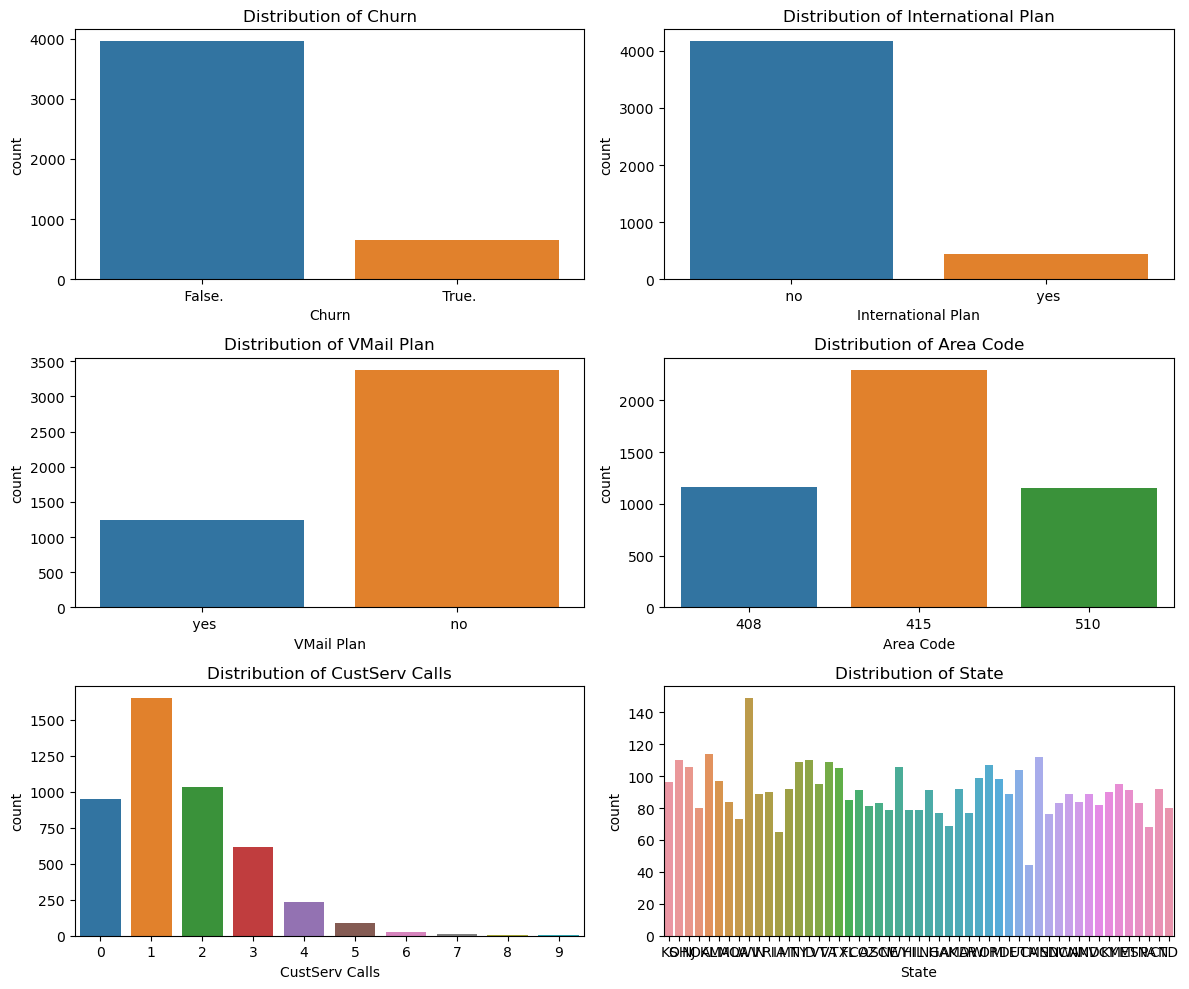

In [15]:
#categorical and discrete data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cat_discrete_col.columns:
    plt.subplot(3,2,plotnumber)
    sns.countplot(data = df, x=col)
    plt.title(f'Distribution of {col}')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


###### Insights :

1. Churn : 
 * The majority of customers are not churning.
 * We need to focus on understanding the factors that are driving the minority to churn.
2. International Plan:
 * Most customers do not have an international plan.
 * We should investigate if having an international plan is correlated with higher churn rates.
3. VMail Plan:
 * The distribution is skewed towards customers not having a voicemail plan.
 * It's important to see if having a voicemail plan impacts churn.
4. Area Code:
 * Area codes 415 and 408 have a higher number of customers compared to 510.
 * We should analyze if there are regional differences in churn rates.
5. Customer Service Calls:
 * Most customers make a low number of customer service calls.
 * We should investigate if a higher number of customer service calls correlates with churn.
6. State:
 * The distribution of customers across states is quite varied.
 * We should analyze if there are specific states with higher churn

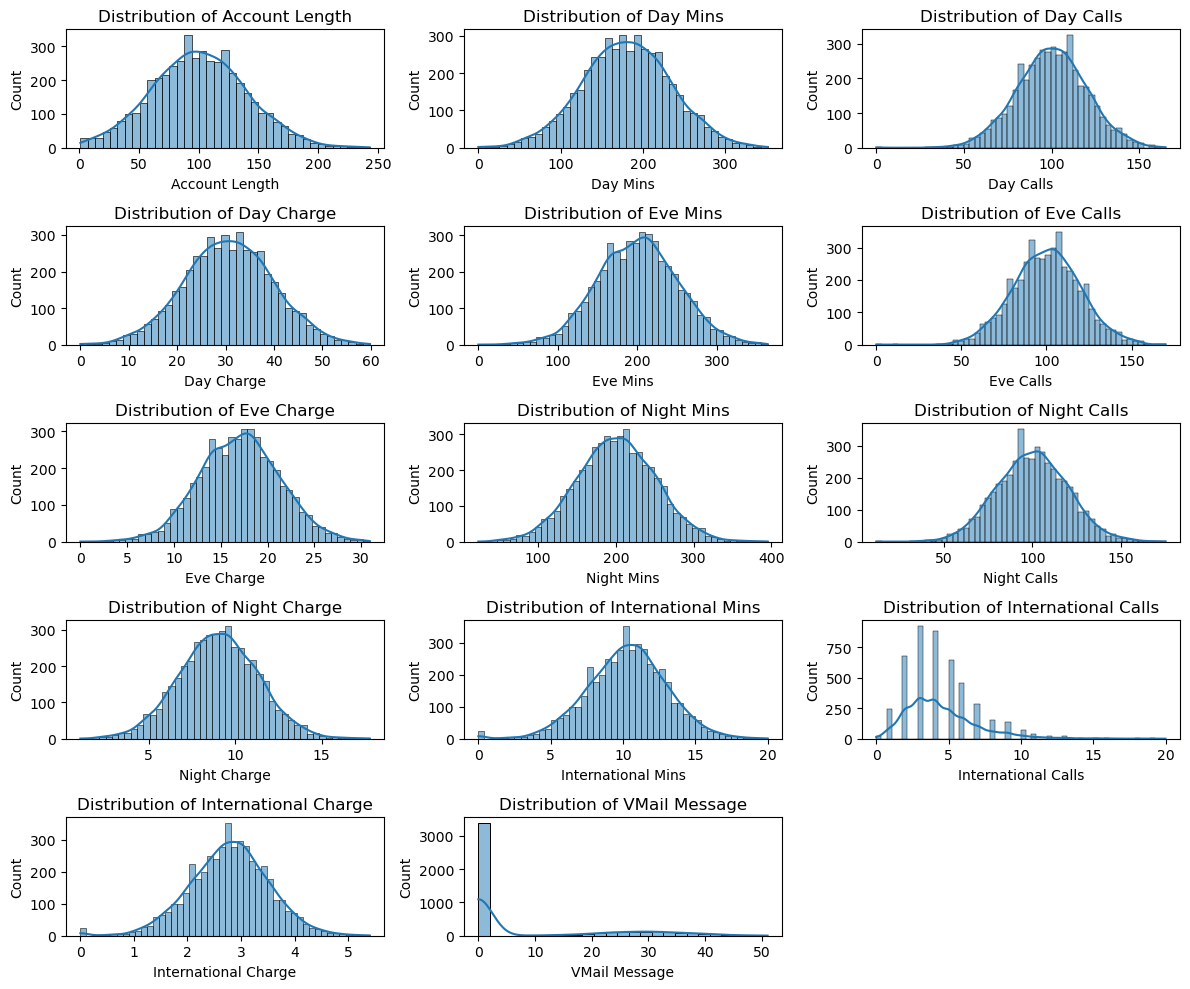

In [16]:
#numerical data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cont_cols.columns:
    plt.subplot(5,3,plotnumber)
    sns.histplot(data = df, x=col, kde = True)
    plt.title(f'Distribution of {col}')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


###### Insights :

1. Account Length:   
 * The distribution is right-skewed, indicating most customers have been with the company for a shorter duration.   
 * There are a few outliers with very long account lengths.   
2. Day Mins, Day Calls, Day Charge:   
 * The distributions for these variables are similar, with a peak around the middle range. This suggests a normal distribution.   
 * There are some outliers with extremely high values for day minutes, calls, and charges.   
3. Eve Mins, Eve Calls, Eve Charge:   
 * Similar to day usage, the distributions for evening usage are also normally distributed.   
 * There are some outliers with extremely high values for evening minutes, calls, and charges.   
4. Night Mins, Night Calls, Night Charge:   
 * The distributions for night usage are also normally distributed.   
 * There are some outliers with extremely high values for night minutes, calls, and charges.   
5. International Mins, International Calls, International Charge:   
 * The distributions for international usage are right-skewed, indicating most customers make fewer international calls and have lower charges.    
 * There are a few outliers with high international usage.   
6. VMail Message:   
 * The distribution is right-skewed, with most customers having a low number of voicemail messages.   
 * There are a few outliers with a high number of voicemail messages.   

### 2. Bivariate Analysis

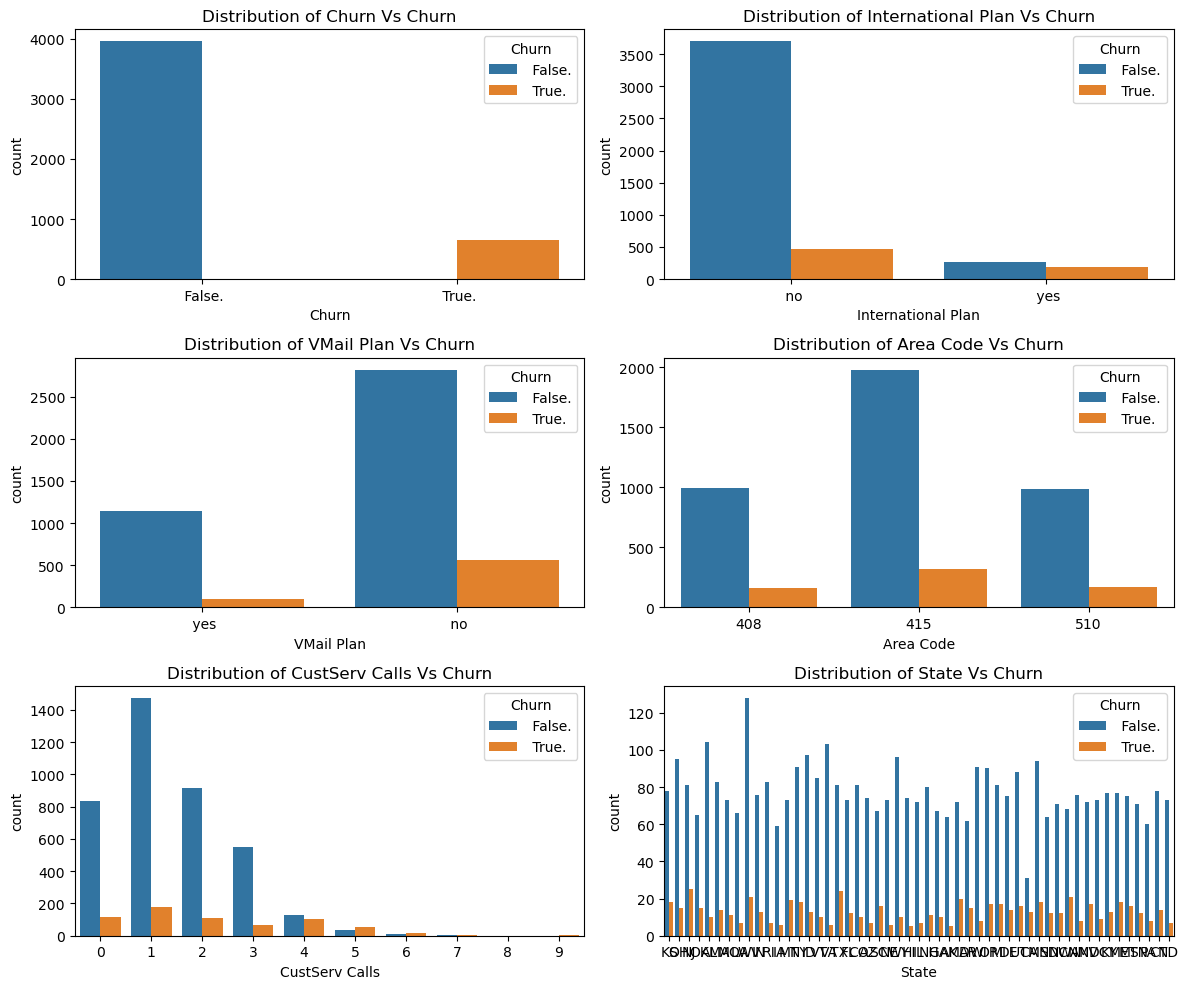

In [17]:
#categorical and discrete data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cat_discrete_col.columns:
    plt.subplot(3,2,plotnumber)
    sns.countplot(data = df, x=col, hue ="Churn")
    plt.title(f'Distribution of {col} Vs Churn')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


###### Insights :

1.Churn vs. International Plan:
 * Customers with an international plan have a higher churn rate compared to those without.    
 * This suggests that international plan customers may be less satisfied or have higher expectations.   
 
2.Churn vs. VMail Plan:
 * There doesn't seem to be a significant difference in churn rates between customers with and without a voicemail plan.   
 
3.Churn vs. Area Code:
 * There might be slight differences in churn rates across different area codes, but further analysis is needed to confirm.  
 
4.Churn vs. Customer Service Calls:
 * Customers with a higher number of customer service calls tend to have a higher churn rate.   
 * This indicates that poor customer service could be a significant driver of churn.   
 
5.Churn vs. State:
 * There appears to be variation in churn rates across different states.   
 * Further analysis is needed to identify specific states with higher or lower churn rates.   

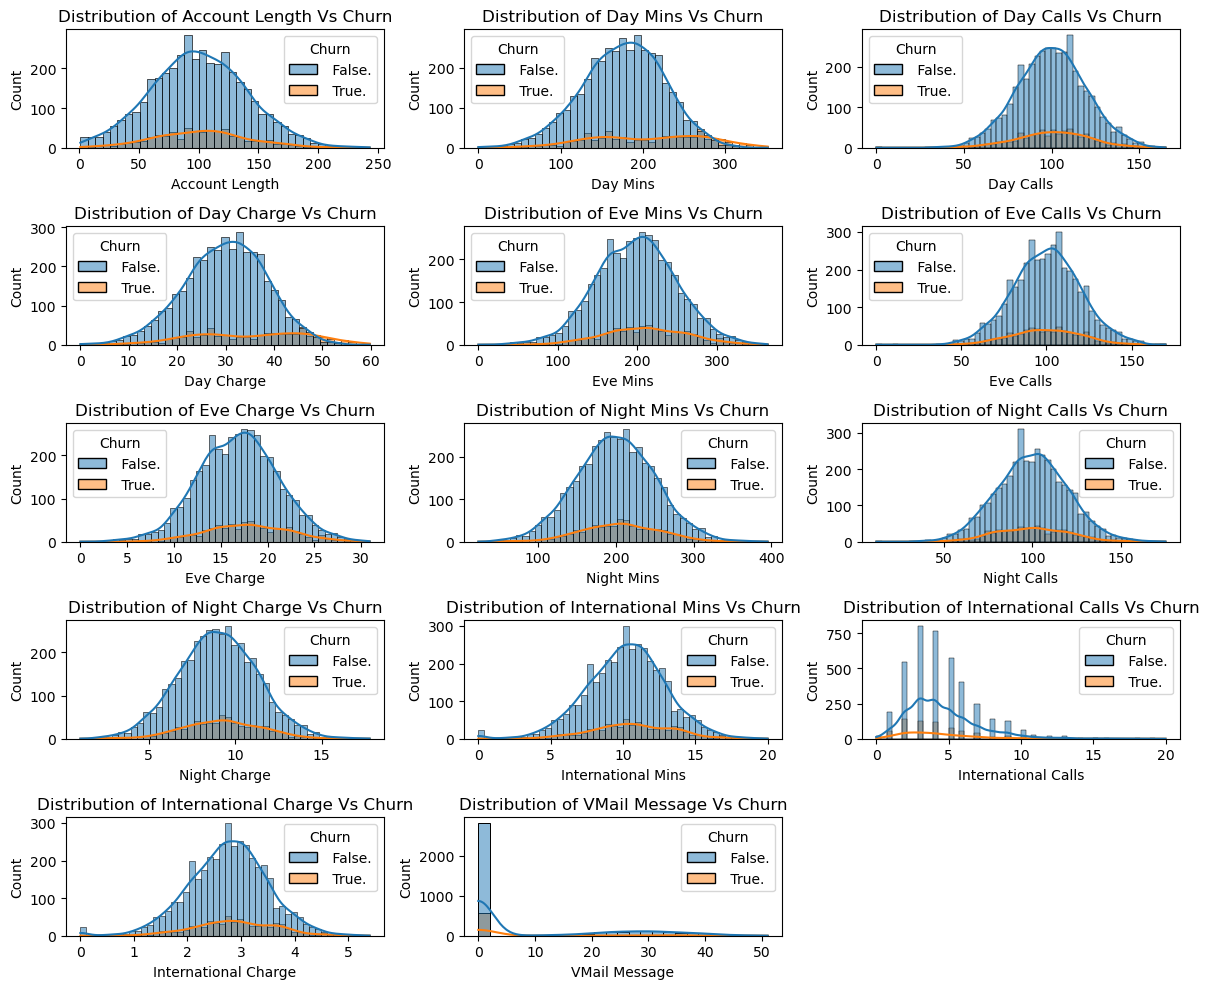

In [18]:
#numerical data
plt.figure(figsize=(12,10))
plotnumber = 1
for col in cont_cols.columns:
    plt.subplot(5,3,plotnumber)
    sns.histplot(data = df, x=col,hue ='Churn', kde = True)
    plt.title(f'Distribution of {col} Vs Churn')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()


###### Insights :

1.Account Length Vs Churn:   
  * There doesn't seem to be a strong relationship between account length and churn.   
  * However, a slightly higher proportion of customers with shorter account lengths are churning.  
  
2.Day Mins, Day Calls, Day Charge Vs Churn:    
  * There appears to be a weak positive correlation between day usage and churn.   
  * Customers with higher day usage are slightly more likely to churn.   
  
3.Eve Mins, Eve Calls, Eve Charge VS Churn:    
  * There doesn't seem to be a strong relationship between evening usage and churn.   
  * However, a slightly higher proportion of customers with higher evening usage are churning.   
  
4.Night Mins, Night Calls, Night Charge Vs Churn:   
  * There doesn't seem to be a strong relationship between night usage and churn.   
  
5.International Mins, International Calls, International Charge Vs Churn:   
  * There is a clear positive correlation between international usage and churn.   
  * Customers with higher international usage are more likely to churn.    
  
6.VMail Message Vs Churn:   
  * There doesn't seem to be a strong relationship between voicemail usage and churn.   

# Data Preprocessing

### Handling Null Values

In [19]:
df.isnull().sum().sum()

0

##### - no null values

# Conversion of categorical data to Numerical data

In [20]:
le = LabelEncoder()

In [21]:
df['International Plan'] = le.fit_transform(df['International Plan'])

In [22]:
df['VMail Plan'] = le.fit_transform(df['VMail Plan'])

In [23]:
df['State'] = le.fit_transform(df['State'])

In [24]:
df.Churn = df.Churn.replace({' False.': 0,' True.': 1})

In [25]:
df

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,32,177,408,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


# Feature Selection

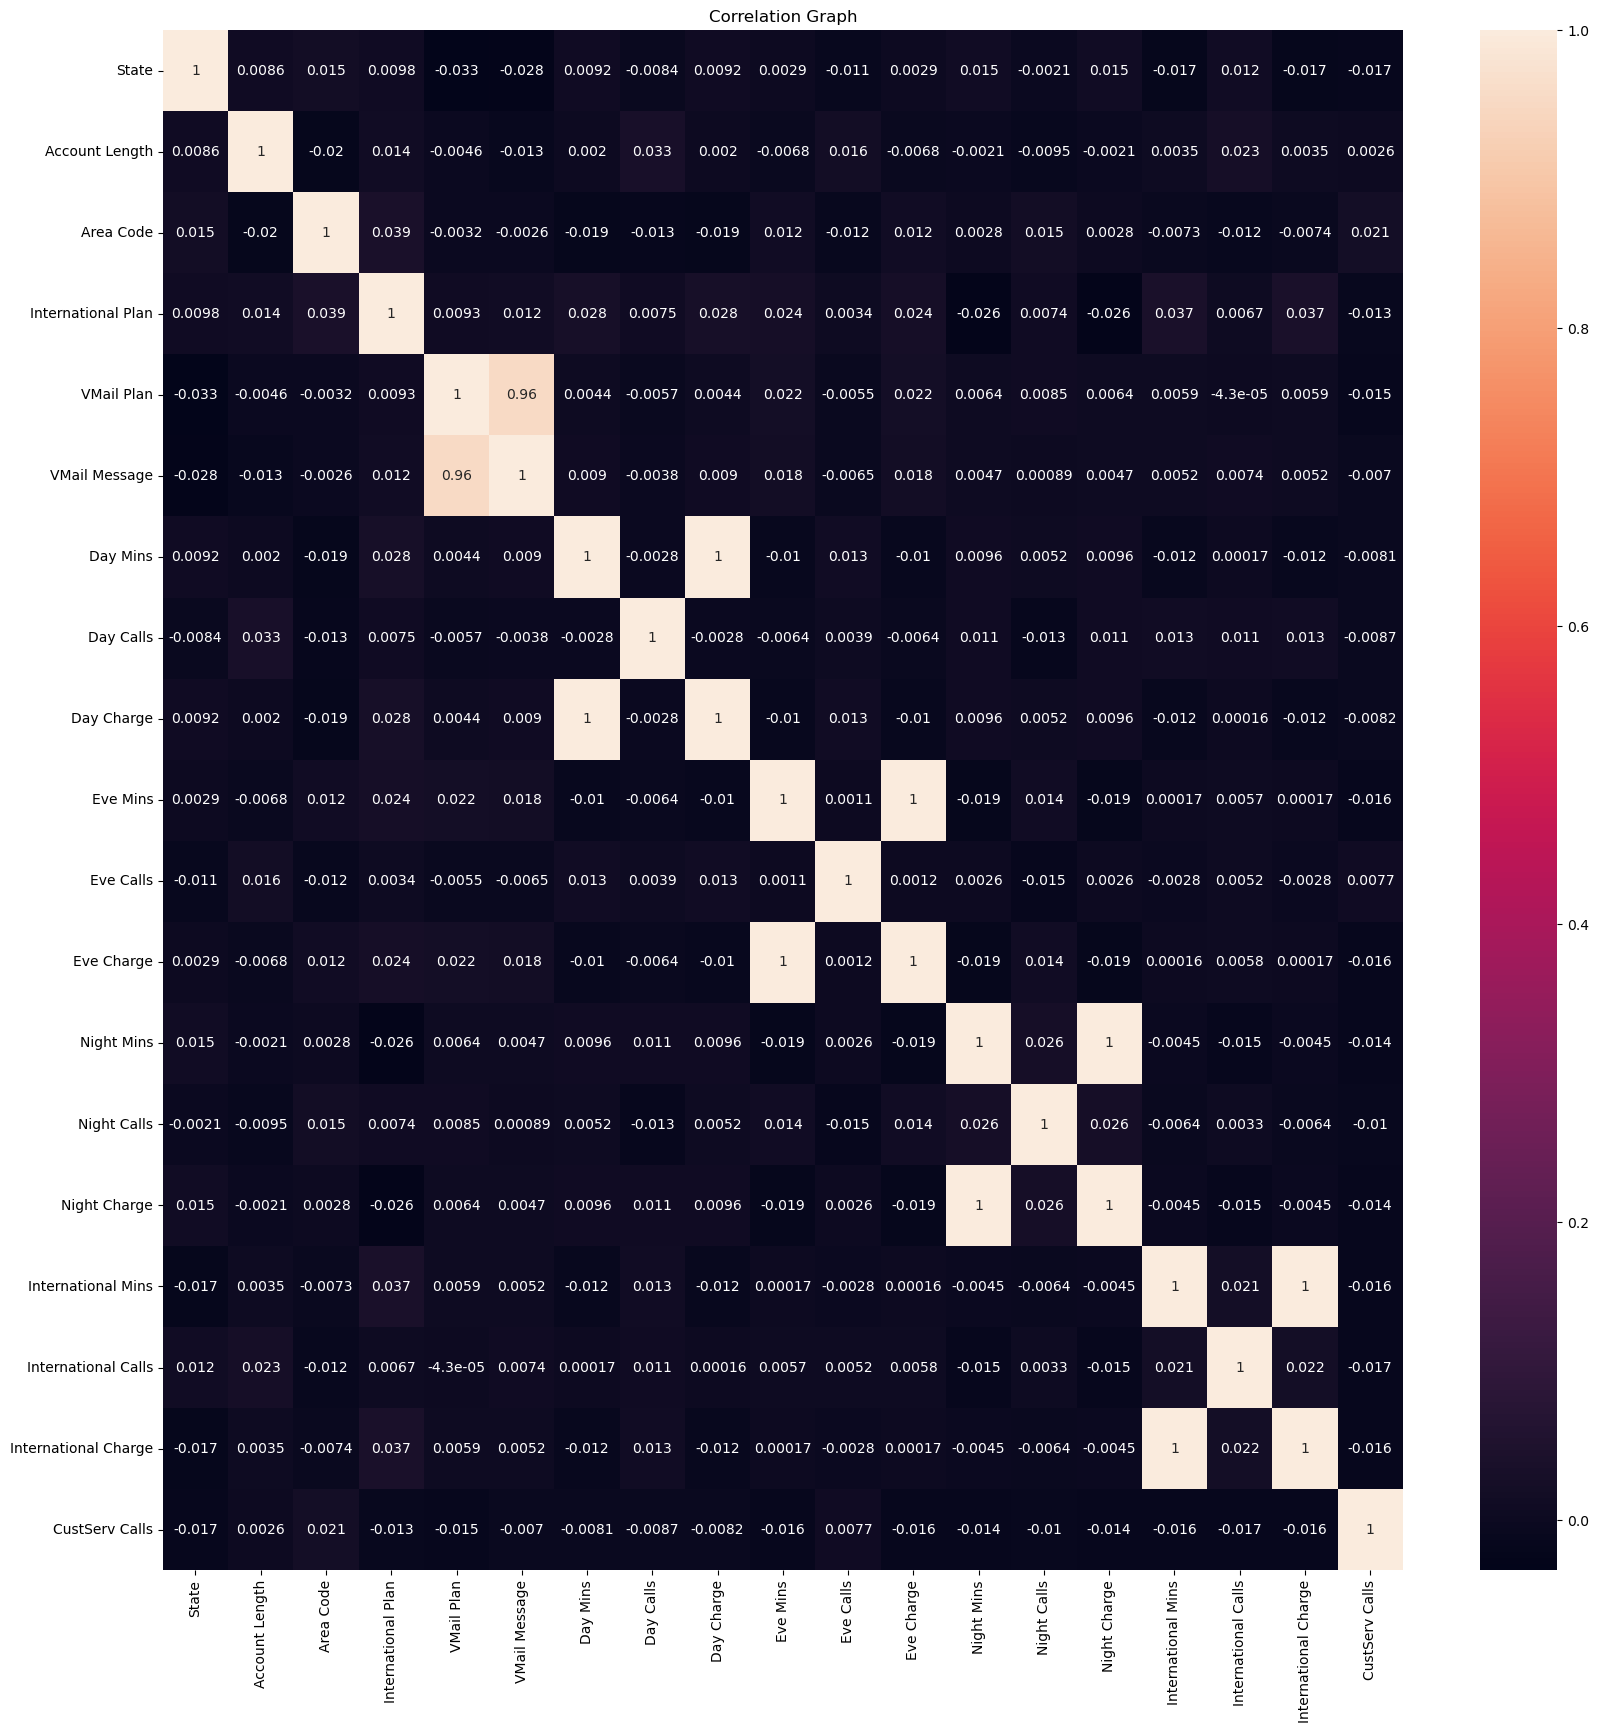

In [26]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('Churn',axis = 1).corr(), annot = True)
plt.title('Correlation Graph')
plt.show()

In [27]:
#dropping the features with highest correlation pair
df.drop(['VMail Message','Day Mins','Eve Mins','Night Mins','International Mins'], axis = 1, inplace = True)

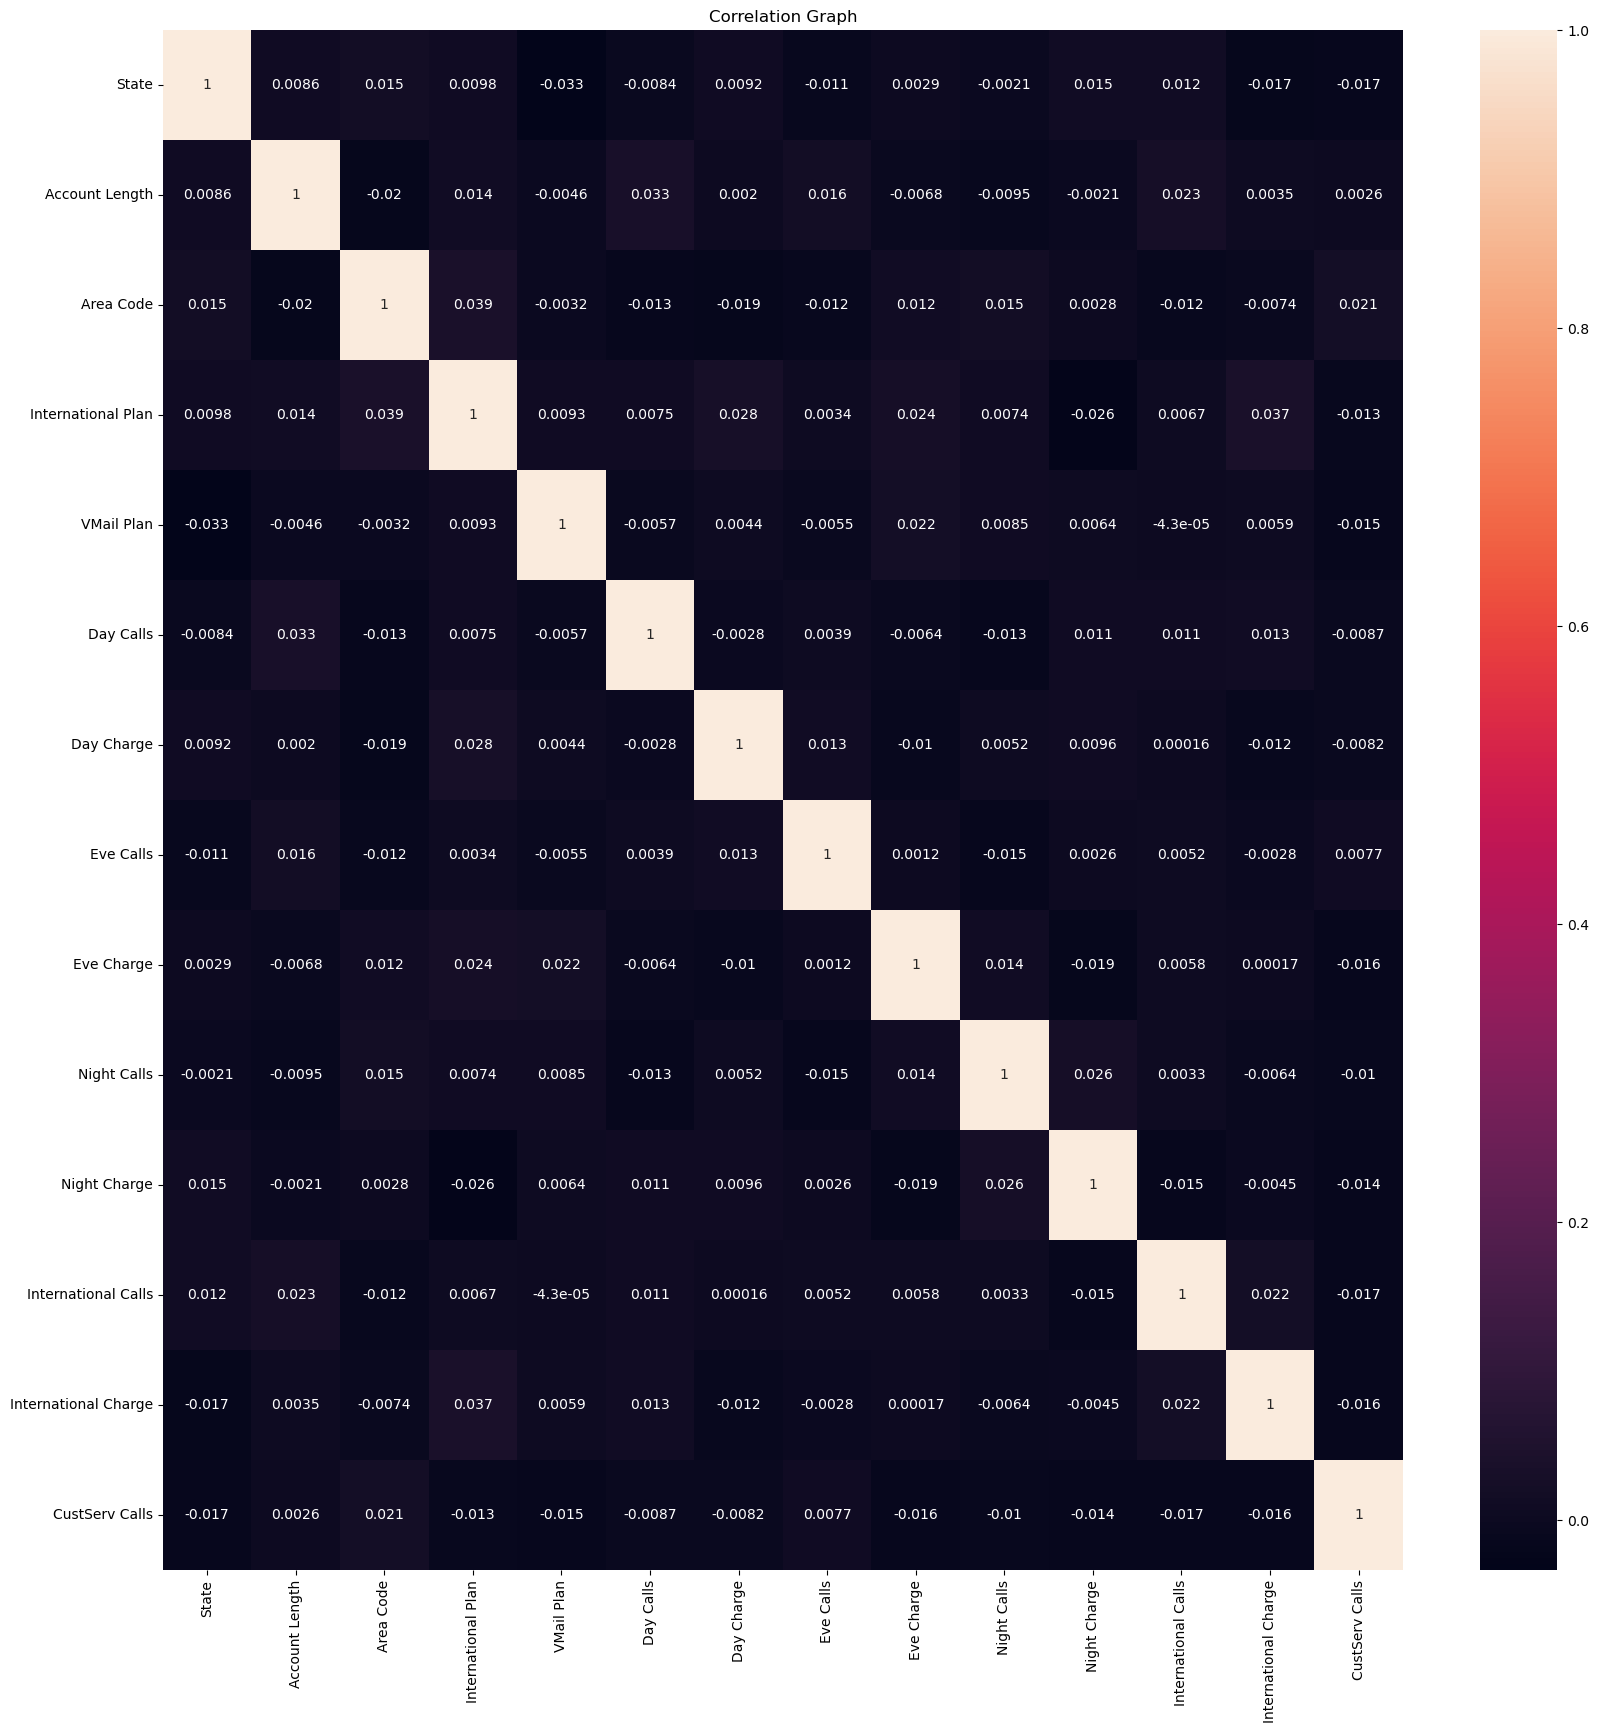

In [28]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('Churn',axis = 1).corr(), annot = True)
plt.title('Correlation Graph')
plt.show()

# splitting data 

In [29]:
x = df.drop('Churn', axis = 1)

In [30]:
y = df.Churn
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)



## Scaling

In [32]:
scaler = StandardScaler() 

In [33]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [34]:
x_train_scaled= pd.DataFrame(data = x_train_scaled, columns = x_train.columns)
x_train_scaled

,State,Account Length,Area Code,International Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International Calls,International Charge,CustServ Calls
0,1.610262,0.347848,-0.512707,-0.318033,1.615553,-1.065490,-1.024639,0.250150,-0.445306,-0.528694,0.639961,-0.580695,0.959283,-0.437298
1,0.046238,-1.218901,-0.679552,3.144327,-0.618983,-2.022985,-0.666518,1.463490,1.905321,0.869349,-0.126619,-0.580695,0.784741,-0.437298
2,0.998252,0.726900,-0.679552,-0.318033,-0.618983,-0.359967,-2.375484,0.856820,-1.414444,-1.826876,-1.178438,3.059073,-0.302785,-0.437298
3,0.046238,0.069876,1.751616,-0.318033,-0.618983,-0.813517,-0.258326,-0.457631,-0.156428,0.769489,-0.652528,0.632561,-0.920392,-0.437298
4,-0.497771,-0.486067,1.751616,-0.318033,-0.618983,-1.166279,0.745283,-0.659854,-1.025391,0.020537,-0.331634,-0.580695,-0.960671,0.327698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,1.134254,-0.208095,1.751616,-0.318033,-0.618983,-0.712728,1.103404,-1.064300,-1.833783,1.069069,-0.879828,-0.176276,-0.987524,-0.437298
3458,-1.177781,0.802710,1.751616,-0.318033,1.615553,0.143978,0.844338,1.261267,-0.368427,0.120398,1.170328,0.228143,0.100003,1.092694
3459,-0.089765,-0.814579,-0.512707,-0.318033,-0.618983,-0.359967,-1.599374,-1.013745,-1.041698,-0.728414,0.261128,-0.985113,-0.047686,-1.202294
3460,-0.157766,-0.031204,-0.679552,-0.318033,-0.618983,-2.476536,0.235859,0.856820,0.789414,-0.378903,-1.098215,-0.176276,0.704184,-0.437298


In [35]:
x_test_scaled= pd.DataFrame(data = x_test_scaled, columns = x_test.columns)
x_test_scaled

,State,Account Length,Area Code,International Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,International Calls,International Charge,CustServ Calls
0,-1.013513,-2.116521,-0.709313,-0.353037,-0.561685,-0.139505,0.313135,0.322978,0.052814,0.203528,0.020974,-0.592217,-0.616051,1.107925
1,-1.613346,-0.804346,-0.547327,-0.353037,-0.561685,0.510810,0.932130,-0.680492,-2.427643,0.203528,0.879946,-0.177414,1.014621,-0.423677
2,1.119227,-0.173493,1.651057,-0.353037,-0.561685,-2.140474,-0.114475,0.874887,1.579605,-0.357510,-0.072117,-1.007020,-0.252182,-1.189477
3,0.985931,0.230253,-0.547327,-0.353037,-0.561685,0.160641,-1.296691,0.072111,-1.255865,0.203528,-0.215984,0.652192,-0.979920,0.342124
4,0.652690,-0.223961,-0.547327,-0.353037,1.780358,-0.489674,-0.518025,0.072111,1.312765,1.478616,1.256539,0.237389,0.327313,4.171127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,-1.546698,-1.132390,-0.547327,-0.353037,1.780358,-2.140474,0.530767,1.577316,0.639863,0.815570,-1.751978,0.237389,-0.467808,-0.423677
1151,-1.613346,-0.173493,-0.547327,-0.353037,-0.561685,0.810956,0.924475,0.473499,0.027290,0.203528,-0.562958,0.652192,1.378490,-0.423677
1152,0.319449,-2.091287,-0.709313,-0.353037,-0.561685,-0.089481,0.110813,-2.185697,1.052885,1.325605,0.249469,1.066996,1.526733,0.342124
1153,-1.346754,0.835872,-0.547327,2.832567,-0.561685,2.561804,-0.055419,-0.881186,0.164191,0.662560,0.672608,0.237389,0.259930,0.342124


# Balancing

In [36]:
sm = SMOTE()

In [37]:
x_sm,y_sm = sm.fit_resample(x_train_scaled,y_train)

In [38]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 2963, 1: 499})
Counter({0: 2963, 1: 2963})


# Models

# 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR = LogisticRegression(max_iter = 1000,random_state = 42)

In [41]:
LR.fit(x_sm,y_sm)

LogisticRegression(max_iter=1000, random_state=42)

###### prediction

In [42]:
LR_y_train = LR.predict(x_sm)
LR_y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [43]:
LR_y_pred = LR.predict(x_test_scaled)
LR_y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
LR_y_pred_prob = LR.predict_proba(x_test_scaled)[:,1]
LR_y_pred_prob

array([0.58317316, 0.35371294, 0.2203101 , ..., 0.5340323 , 0.91624016,
       0.57438546])

###### Evaluation

In [45]:
LR_acc_train = accuracy_score(y_sm,LR_y_train)
LR_acc_train

0.7826527168410395

In [46]:
print(classification_report(y_sm,LR_y_train))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2963
           1       0.78      0.79      0.78      2963

    accuracy                           0.78      5926
   macro avg       0.78      0.78      0.78      5926
weighted avg       0.78      0.78      0.78      5926



In [47]:
LR_acc_test = accuracy_score(y_test,LR_y_pred)
print('ACCURACY SCORE:',LR_acc_test)
LR_pre = precision_score(y_test,LR_y_pred)
print('PRECISION SCORE:',LR_pre)
LR_recall = recall_score(y_test,LR_y_pred)
print('RECALL SCORE:',LR_recall)
LR_f1 = f1_score(y_test,LR_y_pred)
print('F1 SCORE:',LR_f1)
LR_roc = roc_auc_score(y_test,LR_y_pred_prob)
print('ROC AUC SCORE:',LR_roc)
print('-----')
print('LR CLASSIFICATION REPORT:')
print(classification_report(y_test,LR_y_pred))

ACCURACY SCORE: 0.754978354978355
PRECISION SCORE: 0.328804347826087
RECALL SCORE: 0.7707006369426752
F1 SCORE: 0.460952380952381
ROC AUC SCORE: 0.828274383161227
-----
LR CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       998
           1       0.33      0.77      0.46       157

    accuracy                           0.75      1155
   macro avg       0.64      0.76      0.65      1155
weighted avg       0.87      0.75      0.79      1155



In [48]:
pd.crosstab(y_test,LR_y_pred)

col_0,0,1
Churn,,
0,751,247
1,36,121


In [49]:
LR_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [LR_acc_test,LR_pre,LR_recall,LR_f1,LR_roc]})
LR_Metrics

,METRIC,VALUE
0,Accuracy,0.754978
1,Precision,0.328804
2,Recall,0.770701
3,F1 Score,0.460952
4,ROC AUC,0.828274


In [50]:
print("LOGISTIC REGRESSION METRICS:")
print(tabulate(LR_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

LOGISTIC REGRESSION METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.754978 |
+-----------+----------+
| Precision | 0.328804 |
+-----------+----------+
| Recall    | 0.770701 |
+-----------+----------+
| F1 Score  | 0.460952 |
+-----------+----------+
| ROC AUC   | 0.828274 |
+-----------+----------+


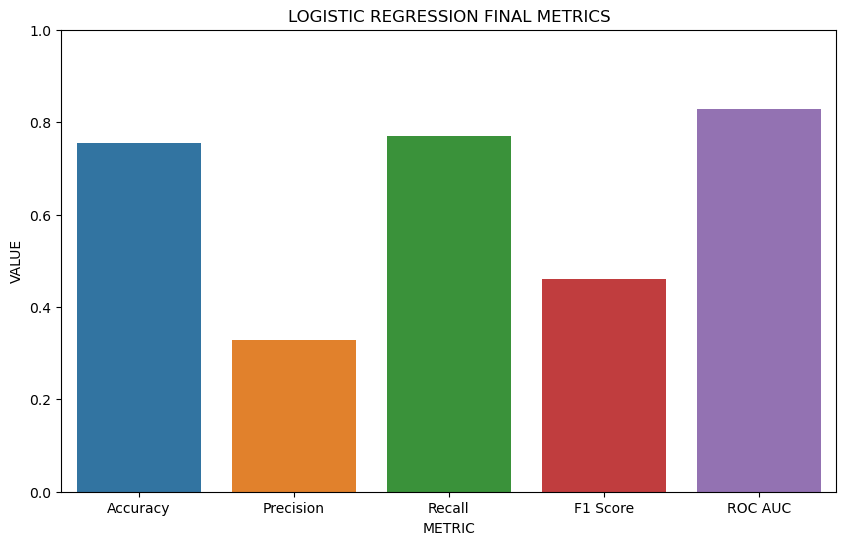

In [51]:
plt.figure(figsize =(10,6))
sns.barplot(data = LR_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('LOGISTIC REGRESSION FINAL METRICS')
plt.ylim(0,1)
plt.show()



- **Logistic Regression**: Performed reasonably well with an accuracy of 0.754, a good recall of 0.77 and moderate F1 score of 0.460. However the precision was low(0.328), indicating that the model was predicting a high number of false positives.

# 2. SVM

In [52]:
from sklearn.svm import SVC
sv = SVC(probability = True)

In [53]:
sv.fit(x_sm,y_sm)

SVC(probability=True)

###### prediction

In [54]:
SV_y_train = sv.predict(x_sm)
SV_y_train

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [55]:
SV_y_pred = sv.predict(x_test_scaled)
SV_y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
SV_y_pred_prob = sv.predict_proba(x_test_scaled)[:,1]
SV_y_pred_prob

array([0.09623678, 0.01500942, 0.15109978, ..., 0.05593671, 0.179137  ,
       0.98084862])

###### Evaluation

In [57]:
SV_acc_train = accuracy_score(y_sm,SV_y_train)
SV_acc_train

0.9308133648329396

In [58]:
print(classification_report(y_sm,SV_y_train))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2963
           1       0.95      0.91      0.93      2963

    accuracy                           0.93      5926
   macro avg       0.93      0.93      0.93      5926
weighted avg       0.93      0.93      0.93      5926



In [59]:
SV_acc_test = accuracy_score(y_test,SV_y_pred)
print('ACCURACY SCORE:',SV_acc_test)
SV_pre = precision_score(y_test,SV_y_pred)
print('PRECISION SCORE:',SV_pre)
SV_recall = recall_score(y_test,SV_y_pred)
print('RECALL SCORE:',SV_recall)
SV_f1 = f1_score(y_test,SV_y_pred)
print('F1 SCORE:',SV_f1)
SV_roc = roc_auc_score(y_test,SV_y_pred_prob)
print('ROC AUC SCORE:',SV_roc)
print('-----')
print('SVM CLASSIFICATION REPORT:')
print(classification_report(y_test,SV_y_pred))

ACCURACY SCORE: 0.8909090909090909
PRECISION SCORE: 0.582010582010582
RECALL SCORE: 0.7006369426751592
F1 SCORE: 0.6358381502890174
ROC AUC SCORE: 0.8985167787804909
-----
SVM CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       998
           1       0.58      0.70      0.64       157

    accuracy                           0.89      1155
   macro avg       0.77      0.81      0.79      1155
weighted avg       0.90      0.89      0.90      1155



In [60]:
pd.crosstab(y_test,SV_y_pred)

col_0,0,1
Churn,,
0,919,79
1,47,110


In [61]:
SV_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [SV_acc_test,SV_pre,SV_recall,SV_f1,SV_roc]})
SV_Metrics

,METRIC,VALUE
0,Accuracy,0.890909
1,Precision,0.582011
2,Recall,0.700637
3,F1 Score,0.635838
4,ROC AUC,0.898517


In [62]:
print("SVM METRICS:")
print(tabulate(SV_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

SVM METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.890909 |
+-----------+----------+
| Precision | 0.582011 |
+-----------+----------+
| Recall    | 0.700637 |
+-----------+----------+
| F1 Score  | 0.635838 |
+-----------+----------+
| ROC AUC   | 0.898517 |
+-----------+----------+


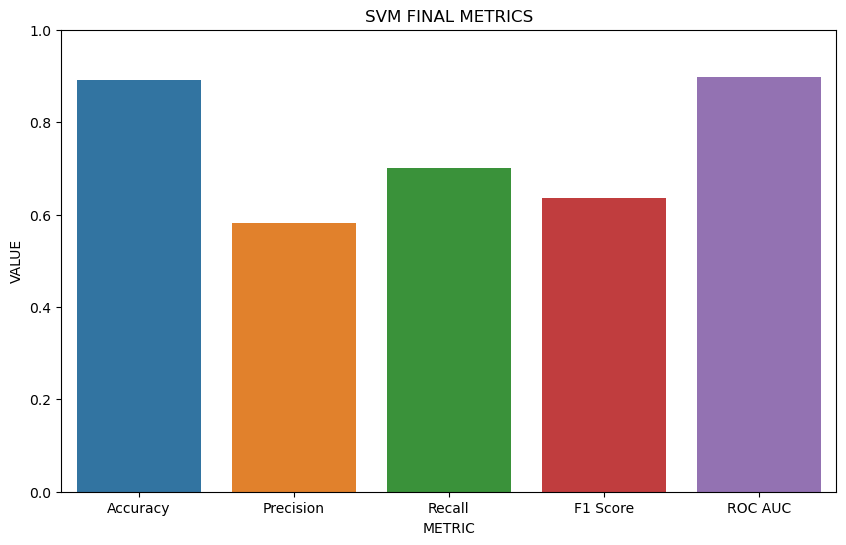

In [63]:
plt.figure(figsize =(10,6))
sns.barplot(data = SV_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('SVM FINAL METRICS')
plt.ylim(0,1)
plt.show()



**SVM**: This model exhibited the best overall performance with an accuracy of 0.89 and a ROC AUC score of 0.898, indicating good model separation. Precision(0.58) and F1 score(0.63, were also higher compared to other models, suggesting that it balanced false positives and false negatives as well.)

# 3.Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [65]:
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

###### Prediction

In [66]:
dt_y_train= dt.predict(x_sm)
dt_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [67]:
dt_y_pred = dt.predict(x_test_scaled)
dt_y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [68]:
dt_y_pred_prob = dt.predict_proba(x_test_scaled)[:,1]
dt_y_pred_prob

array([1., 0., 1., ..., 0., 0., 1.])

###### Evaluation

In [69]:
dt_acc_train = accuracy_score(y_sm,dt_y_train)
dt_acc_train

1.0

In [70]:
print(classification_report(y_sm,dt_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2963
           1       1.00      1.00      1.00      2963

    accuracy                           1.00      5926
   macro avg       1.00      1.00      1.00      5926
weighted avg       1.00      1.00      1.00      5926



In [71]:
dt_acc_test = accuracy_score(y_test,dt_y_pred)
print('ACCURACY SCORE:',dt_acc_test)
dt_pre = precision_score(y_test,dt_y_pred)
print('PRECISION SCORE:',dt_pre)
dt_recall = recall_score(y_test,dt_y_pred)
print('RECALL SCORE:',dt_recall)
dt_f1 = f1_score(y_test,dt_y_pred)
print('F1 SCORE:',dt_f1)
dt_roc = roc_auc_score(y_test,dt_y_pred_prob)
print('ROC AUC SCORE:',dt_roc)

ACCURACY SCORE: 0.5766233766233766
PRECISION SCORE: 0.22053872053872053
RECALL SCORE: 0.8343949044585988
F1 SCORE: 0.3488681757656458
ROC AUC SCORE: 0.685233524373588


In [72]:
pd.crosstab(y_test,dt_y_pred)

col_0,0,1
Churn,,
0,535,463
1,26,131


In [73]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       998
           1       0.22      0.83      0.35       157

    accuracy                           0.58      1155
   macro avg       0.59      0.69      0.52      1155
weighted avg       0.85      0.58      0.64      1155



##### Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

In [76]:
dt1 = DecisionTreeClassifier()

In [77]:
grid = GridSearchCV(dt1, params, scoring='f1', cv = 5, verbose = 3, n_jobs=-1)

In [78]:
grid.fit(x_sm, y_sm)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=3)

In [79]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [80]:
dt2 = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 19,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')

In [81]:
dt2.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=19)

###### prediction

In [82]:
dt2_y_pred = dt2.predict(x_test_scaled)
dt2_y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [83]:
dt2_y_pred_prob = dt2.predict_proba(x_test_scaled)[:,1]
dt2_y_pred_prob

array([1., 0., 0., ..., 0., 0., 1.])

###### Evaluation

In [84]:
dt2_acc_test = accuracy_score(y_test,dt2_y_pred)
print('ACCURACY SCORE:',dt2_acc_test)
dt2_pre = precision_score(y_test,dt2_y_pred)
print('PRECISION SCORE:',dt2_pre)
dt2_recall = recall_score(y_test,dt2_y_pred)
print('RECALL SCORE:',dt2_recall)
dt2_f1 = f1_score(y_test,dt2_y_pred)
print('F1 SCORE:',dt2_f1)
dt2_roc = roc_auc_score(y_test,dt2_y_pred_prob)
print('ROC AUC SCORE:',dt2_roc)
print('----')
print('DECISION TREE CLASSIFICATION REPORT:')
print(classification_report(y_test,dt2_y_pred))

ACCURACY SCORE: 0.43722943722943725
PRECISION SCORE: 0.18028534370946822
RECALL SCORE: 0.8853503184713376
F1 SCORE: 0.2995689655172414
ROC AUC SCORE: 0.6260418927026027
----
DECISION TREE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.37      0.53       998
           1       0.18      0.89      0.30       157

    accuracy                           0.44      1155
   macro avg       0.57      0.63      0.41      1155
weighted avg       0.85      0.44      0.50      1155



In [85]:
pd.crosstab(y_test,dt2_y_pred)

col_0,0,1
Churn,,
0,366,632
1,18,139


In [86]:
dt2_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [dt2_acc_test,dt2_pre,dt2_recall,dt2_f1,dt2_roc]})
dt2_Metrics

,METRIC,VALUE
0,Accuracy,0.437229
1,Precision,0.180285
2,Recall,0.885350
3,F1 Score,0.299569
4,ROC AUC,0.626042


In [87]:
print("DECISION TREE METRICS:")
print(tabulate(dt2_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

DECISION TREE METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.437229 |
+-----------+----------+
| Precision | 0.180285 |
+-----------+----------+
| Recall    | 0.88535  |
+-----------+----------+
| F1 Score  | 0.299569 |
+-----------+----------+
| ROC AUC   | 0.626042 |
+-----------+----------+


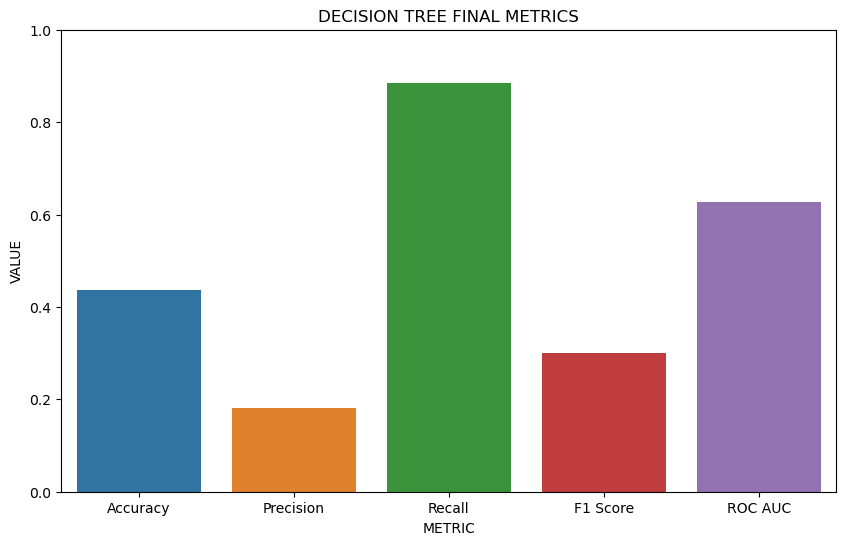

In [88]:
plt.figure(figsize =(10,6))
sns.barplot(data = dt2_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('DECISION TREE FINAL METRICS')
plt.ylim(0,1)
plt.show()


- **Decision Tree**: The baseline performance showed an accuracy of 0.57 with a low precision 0.22, indicating poor prediction of positive churn cases. After hyperparameter tuning, performance dropped further, with accuracy falling to 0.43 and F1 score reducing to 0.29. This indicates overfitting or improper tuning

## 4. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

In [90]:
rf.fit(x_sm,y_sm)

RandomForestClassifier()

###### Prediction

In [91]:
rf_y_train= rf.predict(x_sm)
rf_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
rf_y_pred = rf.predict(x_test_scaled)
rf_y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [93]:
rf_y_pred_prob = rf.predict_proba(x_test_scaled)[:,1]
rf_y_pred_prob

array([0.55, 0.52, 0.38, ..., 0.29, 0.5 , 0.68])

###### Evaluation

In [94]:
rf_acc_train = accuracy_score(y_sm,rf_y_train)
rf_acc_train

1.0

In [95]:
print(classification_report(y_sm,rf_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2963
           1       1.00      1.00      1.00      2963

    accuracy                           1.00      5926
   macro avg       1.00      1.00      1.00      5926
weighted avg       1.00      1.00      1.00      5926



In [96]:
rf_acc_test = accuracy_score(y_test,rf_y_pred)
print('ACCURACY SCORE:',rf_acc_test)
rf_pre = precision_score(y_test,rf_y_pred)
print('PRECISION SCORE:',rf_pre)
rf_recall = recall_score(y_test,rf_y_pred)
print('RECALL SCORE:',rf_recall)
rf_f1 = f1_score(y_test,rf_y_pred)
print('F1 SCORE:',rf_f1)
rf_roc = roc_auc_score(y_test,rf_y_pred_prob)
print('ROC AUC SCORE:',rf_roc)

ACCURACY SCORE: 0.6060606060606061
PRECISION SCORE: 0.24573378839590443
RECALL SCORE: 0.9171974522292994
F1 SCORE: 0.3876177658142665
ROC AUC SCORE: 0.8587908300677788


In [97]:
pd.crosstab(y_test,rf_y_pred)

col_0,0,1
Churn,,
0,556,442
1,13,144


In [98]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71       998
           1       0.25      0.92      0.39       157

    accuracy                           0.61      1155
   macro avg       0.61      0.74      0.55      1155
weighted avg       0.88      0.61      0.67      1155



## Hyper Paramter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [101]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [102]:
rfc = RandomForestClassifier()

In [103]:
rscv = RandomizedSearchCV(estimator=rfc, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [104]:
rscv.fit(x_sm, y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [105]:
rscv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [106]:
rf2 = RandomForestClassifier(n_estimators = 400,                
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 90,
 bootstrap = False)

In [107]:
rf2.fit(x_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=90, n_estimators=400)

In [108]:
rf2_y_pred = rf2.predict(x_test_scaled)
rf2_y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [109]:
rf2_y_pred_prob = rf2.predict_proba(x_test_scaled)[:,1]
rf2_y_pred_prob

array([0.5025, 0.5   , 0.3075, ..., 0.185 , 0.48  , 0.62  ])

In [110]:
rf2_acc_test = accuracy_score(y_test,rf2_y_pred)
print('ACCURACY SCORE:',rf2_acc_test)
rf2_pre = precision_score(y_test,rf2_y_pred)
print('PRECISION SCORE:',rf2_pre)
rf2_recall = recall_score(y_test,rf2_y_pred)
print('RECALL SCORE:',rf2_recall)
rf2_f1 = f1_score(y_test,rf2_y_pred)
print('F1 SCORE:',rf2_f1)
rf2_roc = roc_auc_score(y_test,rf2_y_pred_prob)
print('ROC AUC SCORE:',rf2_roc)
print('------')
print('RANDOM FOREST CLASSIFICATION REPORT:')
print(classification_report(y_test ,rf2_y_pred))

ACCURACY SCORE: 0.5948051948051948
PRECISION SCORE: 0.2341880341880342
RECALL SCORE: 0.8726114649681529
F1 SCORE: 0.3692722371967655
ROC AUC SCORE: 0.846383850503555
------
RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       998
           1       0.23      0.87      0.37       157

    accuracy                           0.59      1155
   macro avg       0.60      0.71      0.54      1155
weighted avg       0.87      0.59      0.66      1155



In [111]:
pd.crosstab(y_test,rf2_y_pred)

col_0,0,1
Churn,,
0,550,448
1,20,137


In [112]:
rf2_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [rf2_acc_test,rf2_pre,rf2_recall,rf2_f1,rf2_roc]})
rf2_Metrics

,METRIC,VALUE
0,Accuracy,0.594805
1,Precision,0.234188
2,Recall,0.872611
3,F1 Score,0.369272
4,ROC AUC,0.846384


In [113]:
print("RANDOM FOREST METRICS AFTER HYPERPARAMTER TUNING:")
print(tabulate(rf2_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

RANDOM FOREST METRICS AFTER HYPERPARAMTER TUNING:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.594805 |
+-----------+----------+
| Precision | 0.234188 |
+-----------+----------+
| Recall    | 0.872611 |
+-----------+----------+
| F1 Score  | 0.369272 |
+-----------+----------+
| ROC AUC   | 0.846384 |
+-----------+----------+


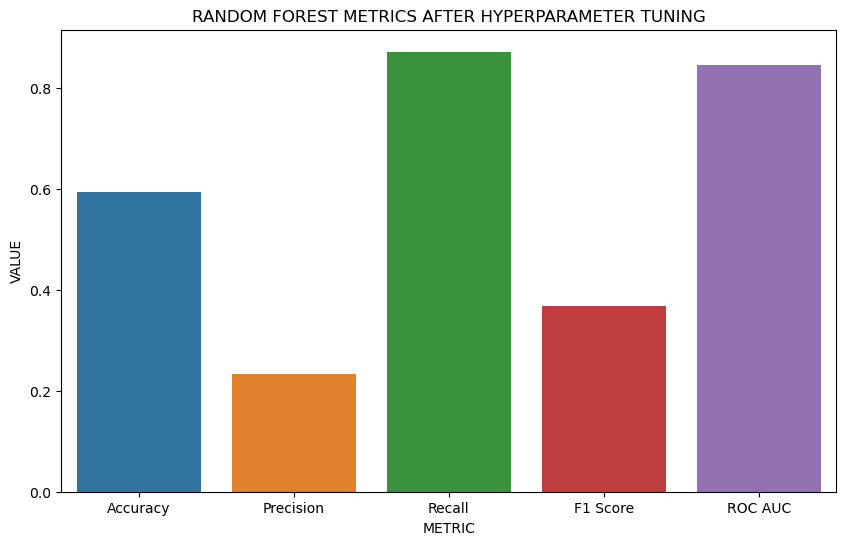

In [114]:
plt.figure(figsize =(10,6))
sns.barplot(data = rf2_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('RANDOM FOREST METRICS AFTER HYPERPARAMETER TUNING')
plt.show()

- **Random Forest**: it performed reasonably well with an accuracy of 0.60 and good recall of 0.91. However after tuning, the performance slightly degraded, indicating the model might be too complex or prone to overfitting with the current tuning parameters.

# 5. XGB

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [116]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###### prediction

In [117]:
xgb_y_train = xgb.predict(x_sm)
xgb_y_train

array([0, 0, 0, ..., 1, 1, 1])

In [118]:
xgb_y_pred = xgb.predict(x_test_scaled)
xgb_y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [119]:
xgb_y_pred_proba = xgb.predict_proba(x_test_scaled)[:,1]
xgb_y_pred_proba

array([0.95650303, 0.17307694, 0.14049368, ..., 0.01307464, 0.02461603,
       0.99231076], dtype=float32)

###### Evaluation

In [120]:
xgb_acc_train  = accuracy_score(y_sm,xgb_y_train)
xgb_acc_train

1.0

In [121]:
print(classification_report(y_sm,xgb_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2963
           1       1.00      1.00      1.00      2963

    accuracy                           1.00      5926
   macro avg       1.00      1.00      1.00      5926
weighted avg       1.00      1.00      1.00      5926



In [122]:
xgb_acc_test = accuracy_score(y_test,xgb_y_pred)
print('ACCURACY SCORE:',xgb_acc_test)
xgb_pre = precision_score(y_test,xgb_y_pred)
print('PRECISION SCORE:',xgb_pre)
xgb_recall = recall_score(y_test,xgb_y_pred)
print('RECALL SCORE:',xgb_recall)
xgb_f1 = f1_score(y_test,xgb_y_pred)
print('F1 SCORE:',xgb_f1)
xgb_roc = roc_auc_score(y_test,xgb_y_pred_proba)
print('ROC AUC SCORE:',xgb_roc)

ACCURACY SCORE: 0.6337662337662338
PRECISION SCORE: 0.2616487455197133
RECALL SCORE: 0.9299363057324841
F1 SCORE: 0.4083916083916084
ROC AUC SCORE: 0.8755919482276655


In [123]:
pd.crosstab(y_test,xgb_y_pred)

col_0,0,1
Churn,,
0,586,412
1,11,146


In [124]:
print(classification_report(y_test,xgb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.59      0.73       998
           1       0.26      0.93      0.41       157

    accuracy                           0.63      1155
   macro avg       0.62      0.76      0.57      1155
weighted avg       0.88      0.63      0.69      1155



# Hyper Parameter Tuning

In [125]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}     #regularization l1,l2 

In [126]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [127]:
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [128]:
rcv.fit(x_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='f1', verbose=2)

In [129]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0})


In [130]:
XGB2 = XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.4, n_estimators=115, max_depth=12, learning_rate=0.2, gamma=0)

In [131]:
XGB2.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=115, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
xgb2_y_pred = XGB2.predict(x_test_scaled)

In [133]:
xgb2_y_pred_prob = XGB2.predict_proba(x_test_scaled)[:,1]

In [134]:
xgb2_acc_test = accuracy_score(y_test,xgb2_y_pred)
print('ACCURACY SCORE:',xgb2_acc_test)
xgb2_pre = precision_score(y_test,xgb2_y_pred)
print('PRECISION SCORE:',xgb2_pre)
xgb2_recall = recall_score(y_test,xgb2_y_pred)
print('RECALL SCORE:',xgb2_recall)
xgb2_f1 = f1_score(y_test,xgb2_y_pred)
print('F1 SCORE:',xgb2_f1)
xgb2_roc = roc_auc_score(y_test,xgb2_y_pred_prob)
print('ROC AUC SCORE:',xgb2_roc)
print('------')
print('GRADIENT BOOSTING CLASSIFICATION REPORT:')
print(classification_report(y_test,xgb2_y_pred))

ACCURACY SCORE: 0.7177489177489178
PRECISION SCORE: 0.31346578366445915
RECALL SCORE: 0.9044585987261147
F1 SCORE: 0.4655737704918032
ROC AUC SCORE: 0.8827144735330532
------
GRADIENT BOOSTING CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       998
           1       0.31      0.90      0.47       157

    accuracy                           0.72      1155
   macro avg       0.65      0.80      0.64      1155
weighted avg       0.89      0.72      0.76      1155



In [135]:
pd.crosstab(y_test,xgb2_y_pred)

col_0,0,1
Churn,,
0,687,311
1,15,142


In [136]:
xgb_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [xgb2_acc_test,xgb2_pre,xgb2_recall,xgb2_f1,xgb2_roc]})
xgb_Metrics

,METRIC,VALUE
0,Accuracy,0.717749
1,Precision,0.313466
2,Recall,0.904459
3,F1 Score,0.465574
4,ROC AUC,0.882714


In [137]:
print("XGB EVALUATION METRICS:")
print(tabulate(xgb_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

XGB EVALUATION METRICS:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.717749 |
+-----------+----------+
| Precision | 0.313466 |
+-----------+----------+
| Recall    | 0.904459 |
+-----------+----------+
| F1 Score  | 0.465574 |
+-----------+----------+
| ROC AUC   | 0.882714 |
+-----------+----------+


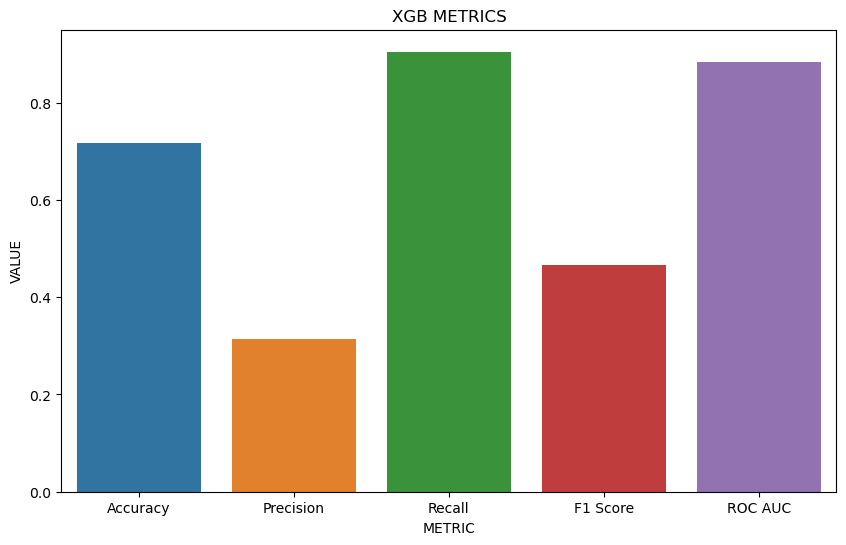

In [138]:
plt.figure(figsize =(10,6))
sns.barplot(data = xgb_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('XGB METRICS')
plt.show()

- **XGBoost**: XGBoost provided moderate accuracy 0.63 and F1 score of 0.40, with good recall of 0.92, showing that it correctly predicted the churn class but struggled with false positives. Tuning improved accuracy and precision marginally.

# 6. KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [141]:
knn.fit(x_sm,y_sm)

KNeighborsClassifier()

###### Predictions

In [142]:
knn_y_train = knn.predict(x_sm)
knn_y_train

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
knn_y_pred = knn.predict(x_test_scaled)
knn_y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [144]:
knn_y_pred_prob  = knn.predict_proba(x_test_scaled)[:,1]
knn_y_pred_prob

array([0. , 0. , 0.2, ..., 0. , 0.2, 0.8])

###### Evaluation

In [145]:
knn_acc_train  = accuracy_score(y_sm,knn_y_train)
knn_acc_train

0.9247384407694904

In [146]:
print(classification_report(y_sm,knn_y_train))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2963
           1       0.87      1.00      0.93      2963

    accuracy                           0.92      5926
   macro avg       0.93      0.92      0.92      5926
weighted avg       0.93      0.92      0.92      5926



In [147]:
knn_acc_test = accuracy_score(y_test,knn_y_pred)
print('ACCURACY SCORE:',knn_acc_test)
knn_pre = precision_score(y_test,knn_y_pred)
print('PRECISION SCORE:',knn_pre)
knn_recall = recall_score(y_test,knn_y_pred)
print('RECALL SCORE:',knn_recall)
knn_f1 = f1_score(y_test,knn_y_pred)
print('F1 SCORE:',knn_f1)
knn_roc = roc_auc_score(y_test,knn_y_pred_prob)
print('ROC AUC SCORE:',knn_roc)
print('------')
print('KNN CLASSIFICATION REPORT:')
print(classification_report(y_test,knn_y_pred))

ACCURACY SCORE: 0.780952380952381
PRECISION SCORE: 0.3562874251497006
RECALL SCORE: 0.7579617834394905
F1 SCORE: 0.4847250509164969
ROC AUC SCORE: 0.8147824311042468
------
KNN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       998
           1       0.36      0.76      0.48       157

    accuracy                           0.78      1155
   macro avg       0.66      0.77      0.67      1155
weighted avg       0.87      0.78      0.81      1155



In [148]:
pd.crosstab(y_test,knn_y_pred)

col_0,0,1
Churn,,
0,783,215
1,38,119


In [149]:
knn_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [knn_acc_test,knn_pre,knn_recall,knn_f1,knn_roc]})
knn_Metrics

,METRIC,VALUE
0,Accuracy,0.780952
1,Precision,0.356287
2,Recall,0.757962
3,F1 Score,0.484725
4,ROC AUC,0.814782


In [150]:
print("KNN EVALUATION METRIC:")
print(tabulate(knn_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

KNN EVALUATION METRIC:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.780952 |
+-----------+----------+
| Precision | 0.356287 |
+-----------+----------+
| Recall    | 0.757962 |
+-----------+----------+
| F1 Score  | 0.484725 |
+-----------+----------+
| ROC AUC   | 0.814782 |
+-----------+----------+


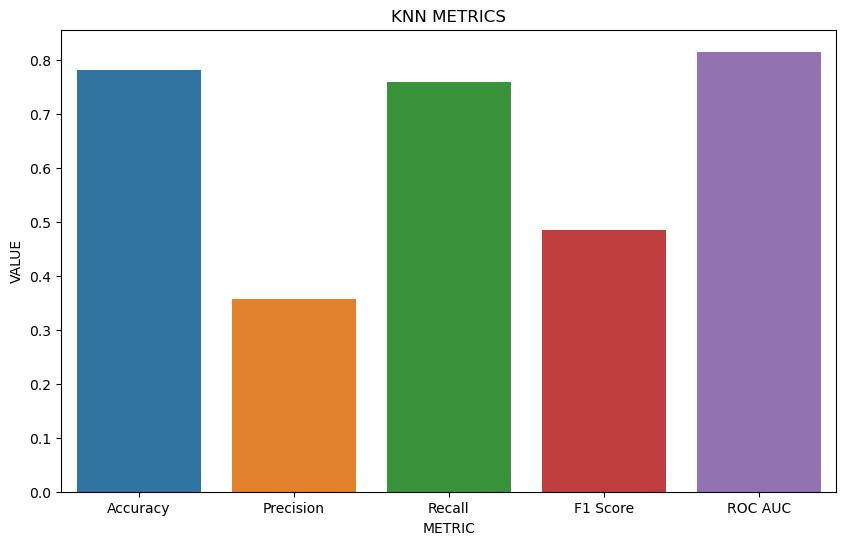

In [151]:
plt.figure(figsize =(10,6))
sns.barplot(data = knn_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('KNN METRICS')
plt.show()

**KNN**: The performance was decent, with an accuracy of 0.78 and F1 score of 0.48. The Precision was low (0.35) and the recall was higher (0.75), but it didn't outperform SVM or ANN

# 7.Naive Bayes

In [152]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [153]:
gnb.fit(x_sm,y_sm)

GaussianNB()

###### Prediction

In [154]:
gnb_y_train= gnb.predict(x_sm)
gnb_y_train

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [155]:
gnb_y_pred = gnb.predict(x_test_scaled)
gnb_y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [156]:
gnb_y_pred_prob = gnb.predict_proba(x_test_scaled)[:,1]
gnb_y_pred_prob

array([0.43338958, 0.22440242, 0.28905472, ..., 0.14001129, 0.99131177,
       0.93641294])

###### Evaluation

In [157]:
gnb_acc_train  = accuracy_score(y_sm,gnb_y_train)
gnb_acc_train

0.813702328720891

In [158]:
print(classification_report(y_sm,gnb_y_train))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2963
           1       0.84      0.77      0.81      2963

    accuracy                           0.81      5926
   macro avg       0.82      0.81      0.81      5926
weighted avg       0.82      0.81      0.81      5926



In [159]:
gnb_acc_test = accuracy_score(y_test,gnb_y_pred)
print('ACCURACY SCORE:',gnb_acc_test)
gnb_pre = precision_score(y_test,gnb_y_pred)
print('PRECISION SCORE:',gnb_pre)
gnb_recall = recall_score(y_test,gnb_y_pred)
print('RECALL SCORE:',gnb_recall)
gnb_f1 = f1_score(y_test,gnb_y_pred)
print('F1 SCORE:',gnb_f1)
gnb_roc = roc_auc_score(y_test,gnb_y_pred_prob)
print('ROC AUC SCORE:',gnb_roc)
print('-----')
print('NAIVE BAYES CLASSIFICATION REPORT:')
print(classification_report(y_test,gnb_y_pred))

ACCURACY SCORE: 0.8225108225108225
PRECISION SCORE: 0.41304347826086957
RECALL SCORE: 0.7261146496815286
F1 SCORE: 0.5265588914549654
ROC AUC SCORE: 0.8327036238081258
-----
NAIVE BAYES CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       998
           1       0.41      0.73      0.53       157

    accuracy                           0.82      1155
   macro avg       0.68      0.78      0.71      1155
weighted avg       0.88      0.82      0.84      1155



In [160]:
pd.crosstab(y_test,gnb_y_pred)

col_0,0,1
Churn,,
0,836,162
1,43,114


In [161]:
gnb_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [gnb_acc_test,gnb_pre,gnb_recall,gnb_f1,gnb_roc]})
gnb_Metrics

,METRIC,VALUE
0,Accuracy,0.822511
1,Precision,0.413043
2,Recall,0.726115
3,F1 Score,0.526559
4,ROC AUC,0.832704


In [162]:
print("NAIVE BAYES EVALUATION METRIC:")
print(tabulate(gnb_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

NAIVE BAYES EVALUATION METRIC:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.822511 |
+-----------+----------+
| Precision | 0.413043 |
+-----------+----------+
| Recall    | 0.726115 |
+-----------+----------+
| F1 Score  | 0.526559 |
+-----------+----------+
| ROC AUC   | 0.832704 |
+-----------+----------+


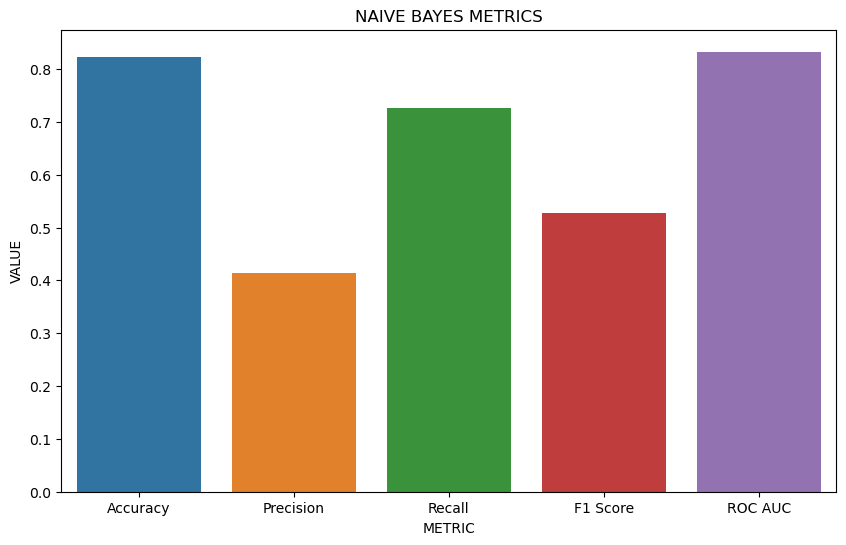

In [163]:
plt.figure(figsize =(10,6))
sns.barplot(data = gnb_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('NAIVE BAYES METRICS')
plt.show()


**Naive Bayes**: With an accuracy of 0.82, Naive Bayes was able to achieve good precision(0.41) and recall(0.72), but it still underperformed in terms of balancing precision and recall, with an F1 score of 0.52

# 8. Artificial Neural Networks

In [164]:
from sklearn.neural_network import MLPClassifier

In [165]:
ann = MLPClassifier(hidden_layer_sizes=(50,3),activation = 'relu', solver = 'adam', max_iter = 1000,random_state = 42)

In [166]:
ann.fit(x_sm,y_sm)

MLPClassifier(hidden_layer_sizes=(50, 3), max_iter=1000, random_state=42)

###### predictions

In [167]:
ann_y_train = ann.predict(x_sm)
ann_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [168]:
ann_y_pred = ann.predict(x_test_scaled)
ann_y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [169]:
ann_y_pred_prob = ann.predict_proba(x_test_scaled)[:,1]
ann_y_pred_prob

array([1.40962104e-03, 2.18025331e-14, 6.34570779e-07, ...,
       3.10073342e-05, 8.84645779e-01, 1.00000000e+00])

###### Evaluations

In [170]:
ann_acc_train  = accuracy_score(y_sm,ann_y_train)
ann_acc_train

0.9998312521093486

In [171]:
print(classification_report(y_sm,ann_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2963
           1       1.00      1.00      1.00      2963

    accuracy                           1.00      5926
   macro avg       1.00      1.00      1.00      5926
weighted avg       1.00      1.00      1.00      5926



In [172]:
ann_acc_test = accuracy_score(y_test,ann_y_pred)
print('ACCURACY SCORE:',ann_acc_test)
ann_pre = precision_score(y_test,ann_y_pred)
print('PRECISION SCORE:',ann_pre)
ann_recall = recall_score(y_test,ann_y_pred)
print('RECALL SCORE:',ann_recall)
ann_f1 = f1_score(y_test,ann_y_pred)
print('F1 SCORE:',ann_f1)
ann_roc = roc_auc_score(y_test,ann_y_pred_prob)
print('ROC AUC SCORE:',ann_roc)
print('------')
print('ANN CLASSIFICATION REPORT:')
print(classification_report(y_test,ann_y_pred))

ACCURACY SCORE: 0.8917748917748918
PRECISION SCORE: 0.5919540229885057
RECALL SCORE: 0.6560509554140127
F1 SCORE: 0.6223564954682779
ROC AUC SCORE: 0.8315612115951649
------
ANN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       998
           1       0.59      0.66      0.62       157

    accuracy                           0.89      1155
   macro avg       0.77      0.79      0.78      1155
weighted avg       0.90      0.89      0.89      1155



In [173]:
pd.crosstab(y_test,ann_y_pred)

col_0,0,1
Churn,,
0,927,71
1,54,103


In [174]:
ann_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [ann_acc_test,ann_pre,ann_recall,ann_f1,ann_roc]})
ann_Metrics

,METRIC,VALUE
0,Accuracy,0.891775
1,Precision,0.591954
2,Recall,0.656051
3,F1 Score,0.622356
4,ROC AUC,0.831561


In [175]:
print("NAIVE BAYES EVALUATION METRIC:")
print(tabulate(ann_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

NAIVE BAYES EVALUATION METRIC:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.891775 |
+-----------+----------+
| Precision | 0.591954 |
+-----------+----------+
| Recall    | 0.656051 |
+-----------+----------+
| F1 Score  | 0.622356 |
+-----------+----------+
| ROC AUC   | 0.831561 |
+-----------+----------+


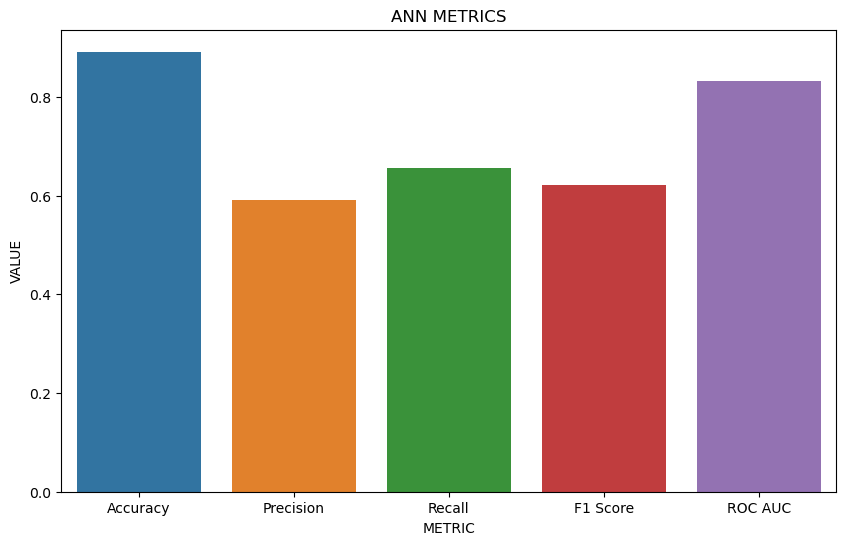

In [176]:
plt.figure(figsize =(10,6))
sns.barplot(data = ann_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('ANN METRICS')
plt.show()


**ANN**: ANN showed strong performance with accuracy of 0.89 and a solid F1 score of 0.62. Although the recall is decent (0.65), the precision is somewhat low, indicating that the model tends to overpredict churn.

# 9.LightGBM

In [177]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(class_weight = 'balanced')

In [178]:
gbm.fit(x_sm,y_sm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2963, number of negative: 2963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 5926, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

###### Predictions

In [179]:
lgb_y_train = gbm.predict(x_sm)
lgb_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [180]:
lgb_y_pred = gbm.predict(x_test_scaled)
lgb_y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [181]:
lgb_y_pred_prob = gbm.predict_proba(x_test_scaled)[:,1]
lgb_y_pred_prob

array([0.88829166, 0.17174226, 0.74123879, ..., 0.22563632, 0.82925669,
       0.98884585])

###### Evaluations

In [182]:
lgb_acc_train  = accuracy_score(y_sm,lgb_y_train)
lgb_acc_train

0.9964562942963213

In [183]:
print(classification_report(y_sm,lgb_y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2963
           1       1.00      0.99      1.00      2963

    accuracy                           1.00      5926
   macro avg       1.00      1.00      1.00      5926
weighted avg       1.00      1.00      1.00      5926



In [184]:
lgb_acc_test = accuracy_score(y_test,lgb_y_pred)
print('ACCURACY SCORE:',lgb_acc_test)
lgb_pre = precision_score(y_test,lgb_y_pred)
print('PRECISION SCORE:',lgb_pre)
lgb_recall = recall_score(y_test,lgb_y_pred)
print('RECALL SCORE:',lgb_recall)
lgb_f1 = f1_score(y_test,lgb_y_pred)
print('F1 SCORE:',lgb_f1)
lgb_roc = roc_auc_score(y_test,lgb_y_pred_prob)
print('ROC AUC SCORE:',lgb_roc)

ACCURACY SCORE: 0.38961038961038963
PRECISION SCORE: 0.17458432304038005
RECALL SCORE: 0.9363057324840764
F1 SCORE: 0.2942942942942943
ROC AUC SCORE: 0.8535797710069821


In [185]:
pd.crosstab(y_test,lgb_y_pred)

col_0,0,1
Churn,,
0,303,695
1,10,147


In [186]:
print(classification_report(y_test,lgb_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.30      0.46       998
           1       0.17      0.94      0.29       157

    accuracy                           0.39      1155
   macro avg       0.57      0.62      0.38      1155
weighted avg       0.86      0.39      0.44      1155



# Hyper Parameter Tuning

In [187]:
from sklearn.model_selection import RandomizedSearchCV

In [188]:
from scipy.stats import uniform,randint

In [189]:
param_distributions = { 'num_leaves' : randint(20,150),
                      'learning_rate ': uniform(0.01,0.2),
                      'n_estimators' : randint(50,500),
                      'max_depth' : randint(-1,30),
                      'min_child_samples' : randint(10,100),
                      'subsample' : [0.6,0.8,1.0],
                      'colsample_bytree' : [0.6,0.8,1.0],
                      'reg_alpha' : [0,0.1,0.5,1.0],
                      'reg_lambda' : [0,0.1,0.5,1.0]}

In [190]:
random_search = RandomizedSearchCV(gbm,param_distributions,n_iter = 50,cv = 5,scoring = 'roc_auc',verbose = 1, n_jobs = -1,random_state = 42)

In [191]:
random_search.fit(x_sm,y_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.11793842647781595
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.11793842647781595
[LightGBM] [Info] Number of positive: 2963, number of negative: 2963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3122
[LightGBM] [Info] Number of data points in the train set: 5926, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate ': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F6706D44D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F6706D7B90>,
                                        'min_child...ozen object at 0x000001F6706D7A50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F6706D6AD0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F670049190>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [192]:
best_model = random_search.best_estimator_

In [193]:
lgb_y_pred1 = best_model.predict(x_test_scaled)

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.11793842647781595


In [194]:
lgb_y_pred_prob1 = best_model.predict_proba(x_test_scaled)[:,1]

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.11793842647781595


In [195]:
lgb_acc_test1 = accuracy_score(y_test,lgb_y_pred1)
print('ACCURACY SCORE:',lgb_acc_test1)
lgb_pre1 = precision_score(y_test,lgb_y_pred1)
print('PRECISION SCORE:',lgb_pre1)
lgb_recall1 = recall_score(y_test,lgb_y_pred1)
print('RECALL SCORE:',lgb_recall1)
lgb_f11 = f1_score(y_test,lgb_y_pred1)
print('F1 SCORE:',lgb_f11)
lgb_roc1 = roc_auc_score(y_test,lgb_y_pred_prob1)
print('ROC AUC SCORE:',lgb_roc1)
print('-----')
print('LIGHT GBM CLASSIFICATION REPORT:')
print(classification_report(y_test,lgb_y_pred1))

ACCURACY SCORE: 0.47965367965367967
PRECISION SCORE: 0.1983695652173913
RECALL SCORE: 0.9299363057324841
F1 SCORE: 0.3269876819708846
ROC AUC SCORE: 0.8677035599862145
-----
LIGHT GBM CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.41      0.58       998
           1       0.20      0.93      0.33       157

    accuracy                           0.48      1155
   macro avg       0.59      0.67      0.45      1155
weighted avg       0.87      0.48      0.54      1155



In [196]:
pd.crosstab(y_test,lgb_y_pred1)

col_0,0,1
Churn,,
0,408,590
1,11,146


In [197]:
lgb_Metrics =pd.DataFrame({'METRIC': ['Accuracy','Precision','Recall','F1 Score','ROC AUC'],'VALUE' : [lgb_acc_test1,lgb_pre1,lgb_recall1,lgb_f11,lgb_roc1]})
lgb_Metrics

,METRIC,VALUE
0,Accuracy,0.479654
1,Precision,0.198370
2,Recall,0.929936
3,F1 Score,0.326988
4,ROC AUC,0.867704


In [198]:
print("LiGHT GBM EVALUATION METRIC:")
print(tabulate(lgb_Metrics,headers ='keys',tablefmt= 'grid',showindex = False))

LiGHT GBM EVALUATION METRIC:
+-----------+----------+
| METRIC    |    VALUE |
+===========+==========+
| Accuracy  | 0.479654 |
+-----------+----------+
| Precision | 0.19837  |
+-----------+----------+
| Recall    | 0.929936 |
+-----------+----------+
| F1 Score  | 0.326988 |
+-----------+----------+
| ROC AUC   | 0.867704 |
+-----------+----------+


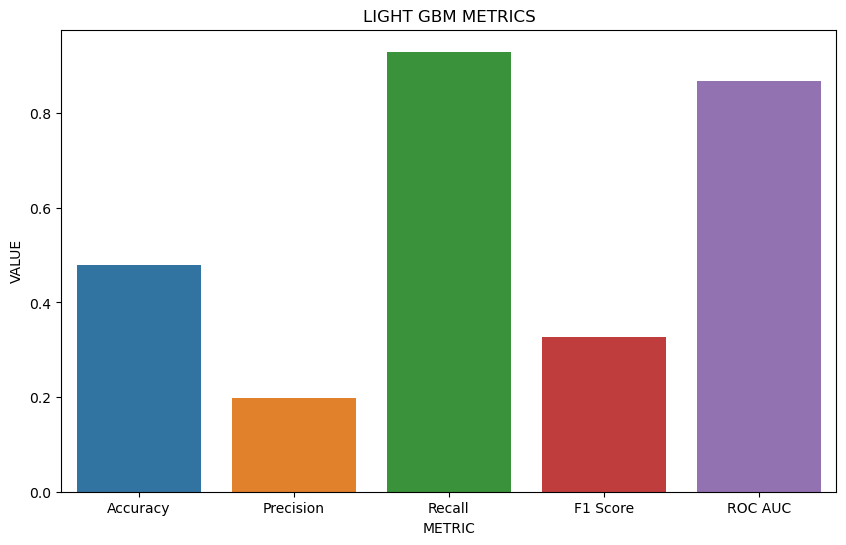

In [199]:
plt.figure(figsize =(10,6))
sns.barplot(data = lgb_Metrics,x = 'METRIC', y = 'VALUE')
plt.title('LIGHT GBM METRICS')
plt.show()


- **LightGBM**: it performed poorly with a low accuracy of 0.47 and precision of 0.19 but had a high recall of 0.92, indicating that it effectively predicted the most of the churn cases, though at the cost of many false positives.

# PROJECT CONCLUSION :

The project focuses on analyzing customer churn, generating churn risk scores, identifying churn-flagged customers, and prioritizing those for targeted retention campaigns. Based on the performance of multiple machine learning algorithms, we have selected the most effective algorithms for each of these four key goals, ensuring the best results aligned with the business objectives.

#### Model Selection:

- **Best Model for Accuracy: Artificial Neural Networks(ANN)** with the highest accuracy of 0.891

- **Best Model for Recall: LIghtGBM**, which makes it excellent for identifying customers likely to churn,though at the cost of many false positives, it needs tuning for precision

- **Best Model for Balance Between Precision and Recall: Support Vector Machine (SVM)** with accuracy of 0.890,precision of 0.582,recall of 0.700 and ROC AUC of 0.898

## GOAL 1: Understandng the Variables Influencing Customers Migration

- **Chosen Algorithm**: **Logistic Regression**

Top Influencing Variables:
                 Feature  Importance
13        CustServ Calls    0.127593
3     International Plan    0.089086
6             Day Charge    0.080833
4             VMail Plan    0.028042
8             Eve Charge    0.022301
12  International Charge    0.008127
10          Night Charge    0.004756
11   International Calls    0.002098
5              Day Calls    0.000943
1         Account Length    0.000619


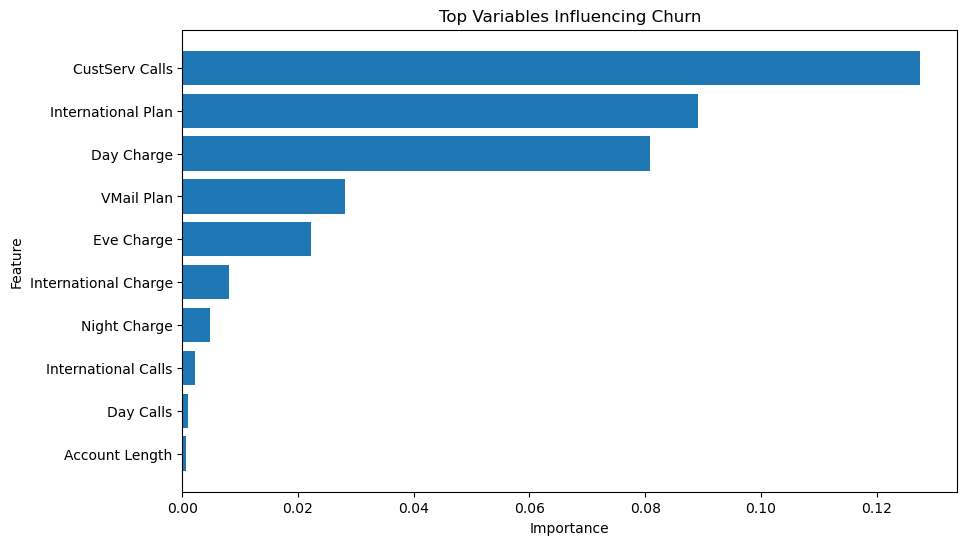

In [201]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(LR, x_test_scaled, y_test, scoring='roc_auc')

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': x_test_scaled.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Influencing Variables:")
print(importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top Variables Influencing Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

- Through the use of permutation importance, we identified the key features driving customer churn. These feautures, such as **CustServ Calls, International Plan, and Day Charge** were found to be most influential. By understanding these variables, businessess can focus on specific areas for improving customer satisfaction and retention

## GOAL 2 : Creating Churn Risk Scores

- **Chosen Algorithm : Support Vector Machines(SVM)**

In [202]:
# Predict churn probabilities
y_pred_prob = sv.predict_proba(x_test_scaled)[:,1]  # Probability for churn (Class 1)

# Save churn risk scores
churn_risk_df = pd.DataFrame({
    'Churn_Risk_Score': SV_y_pred_prob
})
print("Churn Risk Scores Generated")
churn_risk_df

Churn Risk Scores Generated


,Churn_Risk_Score
0,0.096237
1,0.015009
2,0.151100
3,0.079724
4,0.754061
...,...
1150,0.007062
1151,0.179413
1152,0.055937
1153,0.179137


- by leveraging churn risk scores, businesses can prioritize customers with highest risk of leaving,enabling more targeted and efficient retention efforts, like discounts, personalized offers or loyalty rewards.

# GOAL 3: Introducing "CHURN-FLAG" Variable

- **Choosen Algorithm : LightGBM**

In [203]:
# Create churn flag
churn_risk_df['Churn_Flag'] = (lgb_y_pred_prob > 0.5).astype(int)

# Save results with churn flag
print("Churn Risk Scores with Churn Flags:")
print(churn_risk_df.head())

# Save to CSV
churn_risk_df.to_csv('churn_risk_scores_with_flags.csv', index=False)

Churn Risk Scores with Churn Flags:
   Churn_Risk_Score  Churn_Flag
0          0.096237           1
1          0.015009           0
2          0.151100           1
3          0.079724           1
4          0.754061           1


- This variable allows for clear segmentation of customers, so retention campaigns can focus on those flagged as 'YES' to take immediate action on high risk customers

# GOAL 4: help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.

## 1. Predicting Churn Flagged Customers

- **Chosen Algorithm : LightGBM**

In [204]:
churn_risk_df['Churn_Flag'] = (lgb_y_pred_prob > 0.5).astype(int)

# Filter churn-flagged customers for high priority actions
churn_yes_customers = churn_risk_df[churn_risk_df['Churn_Flag'] == 1]

# Save flagged customers for further action
print("High Priority Churn-Flagged Customers:")
print(churn_yes_customers)

# Save to CSV for client analysis
churn_yes_customers.to_csv('high_priority_customers.csv', index=False)

High Priority Churn-Flagged Customers:
      Churn_Risk_Score  Churn_Flag
0             0.096237           1
2             0.151100           1
3             0.079724           1
4             0.754061           1
5             0.140585           1
...                ...         ...
1149          0.052172           1
1150          0.007062           1
1151          0.179413           1
1153          0.179137           1
1154          0.980849           1

[842 rows x 2 columns]


- By focusing on these customers, businesses can improve customer retention by providing personalized services and quicker resolution to issues, such as:
    
- **Customer Care Support**: Offering proactive assistance to high risk customers.
- **Quick Issue Resolution**: Automatically categorizing tickets from high risk customers as high priority to ensure quick resolutions.

In [205]:
print(churn_yes_customers.columns)

Index(['Churn_Risk_Score', 'Churn_Flag'], dtype='object')


## 2. Customer Segmentation

- Churn-flagged customers were segmented into:

**High Priority**: Customers with multiple unresolved tickets or frequent complaints.

**Medium Priority**: Customers with moderate engagement issues.

**Low Priority**: Customers with minor concerns.

In [206]:
# Simple segmentation based on churn risk score
churn_yes_customers['Priority_Level'] = churn_yes_customers['Churn_Risk_Score'].apply(lambda x: 
    'High' if x >= 0.8 else 
    'Medium' if 0.5 <= x < 0.8 else 
    'Low')

# View segmentation
print(churn_yes_customers[['Churn_Risk_Score', 'Priority_Level']].head())

# Save segmented data
churn_yes_customers.to_csv('segmented_churn_customers.csv', index=False)

   Churn_Risk_Score Priority_Level
0          0.096237            Low
2          0.151100            Low
3          0.079724            Low
4          0.754061         Medium
5          0.140585            Low


C:\Users\mdsmb\AppData\Local\Temp\ipykernel_13196\2810562245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes_customers['Priority_Level'] = churn_yes_customers['Churn_Risk_Score'].apply(lambda x:


### 3. Automating Ticket Categorization

An automated system was designed to categorize customer tickets into high, normal, and low priorities based on segmentation. This ensures prompt responses to high-priority customers.

In [207]:
# Function to auto-categorize tickets
def categorize_ticket(row):
    if row['Priority_Level'] == 'High':
        return 'High Priority'
    elif row['Priority_Level'] == 'Medium':
        return 'Normal Priority'
    else:
        return 'Low Priority'

# Apply categorization
churn_yes_customers['Ticket_Category'] = churn_yes_customers.apply(categorize_ticket, axis=1)

# Save for customer support system integration
churn_yes_customers.to_csv('categorized_tickets.csv', index=False)

# Display output
print("Automated Ticket Categories:")
print(churn_yes_customers[['Priority_Level', 'Ticket_Category']].head())

Automated Ticket Categories:
  Priority_Level  Ticket_Category
0            Low     Low Priority
2            Low     Low Priority
3            Low     Low Priority
4         Medium  Normal Priority
5            Low     Low Priority


C:\Users\mdsmb\AppData\Local\Temp\ipykernel_13196\1289318726.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes_customers['Ticket_Category'] = churn_yes_customers.apply(categorize_ticket, axis=1)


### 4. Actionable Insights

###### Insights and Dashboard Preparartion

In [208]:
# Summary statistics for churn analysis
priority_summary = churn_yes_customers['Priority_Level'].value_counts()
print("Priority Distribution:")
print(priority_summary)

# Save summary to a CSV
priority_summary.to_csv('priority_summary.csv', index=True)

Priority Distribution:
Priority_Level
Low       651
High      105
Medium     86
Name: count, dtype: int64


# Overall Project Conclusion:

- This project successfully addressed the client’s objectives by leveraging machine learning to predict churn, assign risk scores, and identify at-risk customers. The use of models like Logistic Regression, SVM, and LightGBM provided a balance of interpretability, accuracy, and recall, ensuring actionable insights for churn mitigation. These results equip the client with a data-driven foundation to reduce churn and enhance customer retention effectively.